# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [5]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Import the libraries
import numpy as np
import pandas as pd

### **1.1 Load the Data**

In [7]:
# Load the dataset
df = pd.read_csv("Employee_data.csv")

In [8]:
# Check the first few entries
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


In [9]:
# Inspect the shape of the dataset
df.shape

(74610, 24)

In [10]:
# Inspect the different columns in the dataset
df.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **1.2 Check the basic statistics**

In [11]:
# Check the summary of the dataset
df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months)
count,74610.000000,74610.000000,74610.000000,74610.000000,74610.000000,72698.000000,74610.000000,72197.000000
mean,37246.028696,38.529379,15.722638,7344.931417,0.832958,49.990839,1.657432,55.711899
std,21505.785344,12.082299,11.224059,2596.373589,0.995326,28.519135,1.579862,25.392325
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18624.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37239.500000,39.000000,13.000000,7348.500000,1.000000,50.000000,1.000000,56.000000
75%,55871.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,50030.000000,4.000000,99.000000,15.000000,128.000000


### **1.3 Check the data type of columns**

In [12]:
# Check the info to see the types of the feature variables and the null values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [13]:
# Check the number of missing values in each column
display(df.isnull().sum())

,0
Employee ID,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,0
Job Satisfaction,0
Performance Rating,0
Number of Promotions,0


2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [14]:
# Check the percentage of missing values in each column
df.isnull().sum()/df.shape[0]*100

,0
Employee ID,0.000000
Age,0.000000
Gender,0.000000
Years at Company,0.000000
Job Role,0.000000
Monthly Income,0.000000
Work-Life Balance,0.000000
Job Satisfaction,0.000000
Performance Rating,0.000000
Number of Promotions,0.000000


Missing values - Distance from Home (2.56%), Company Tenure (In Months) (3.23%)

2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [15]:
# Handle the missing value rows in the column
df = df.dropna()

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [16]:
# Check the percentage of remaining data after missing values are removed
original_rows = 74610
current_rows = df.shape[0]

remaining_percentage = (current_rows / original_rows) * 100
print(f"Remaining data: {remaining_percentage:.2f}% ({current_rows} out of {original_rows} rows)")

Remaining data: 94.67% (70635 out of 74610 rows)


### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [17]:
# Write a function to display the categorical columns with their unique values and check for redundant values
def check_categorical_values(df):
    categorical_cols = df.select_dtypes(include='object').columns
    for col in categorical_cols:
        print(f"Column: {col}")
        print(df[col].value_counts())
        print("-" * 30)

In [18]:
df["Education Level"] = df["Education Level"].str.replace("Masterâ€™s Degree", "Masters Degree")
df["Education Level"] = df["Education Level"].str.replace("Bachelorâ€™s Degree", "Bachelors Degree")

In [19]:
# Check the data
check_categorical_values(df)

Column: Gender
Gender
Male      38700
Female    31935
Name: count, dtype: int64
------------------------------
Column: Job Role
Job Role
Technology    18340
Healthcare    16207
Education     14813
Media         11346
Finance        9929
Name: count, dtype: int64
------------------------------
Column: Work-Life Balance
Work-Life Balance
Good         26683
Fair         21402
Excellent    12740
Poor          9810
Name: count, dtype: int64
------------------------------
Column: Job Satisfaction
Job Satisfaction
High         35332
Very High    14283
Medium       13954
Low           7066
Name: count, dtype: int64
------------------------------
Column: Performance Rating
Performance Rating
Average          42401
High             14151
Below Average    10546
Low               3537
Name: count, dtype: int64
------------------------------
Column: Overtime
Overtime
No     47588
Yes    23047
Name: count, dtype: int64
------------------------------
Column: Education Level
Education Level
Bachelors 

No redundant values found within categorical columns

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [20]:
# Drop redundant columns which are not required for modelling
df = df.drop("Employee ID", axis = 1)

In [21]:
# Check first few rows of data
df.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,3,No,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,8159,Good,High,Low,0,No,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,36,Female,7,Education,3989,Good,High,High,1,No,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [22]:
# Import Train Test Split
from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [23]:
# Put all the feature variables in X
X = df.drop("Attrition", axis = 1)

# Put the target variable in y
y = df["Attrition"]

In [24]:
display(X)

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,...,Married,0,Mid,Medium,89.0,No,No,No,Excellent,Medium
1,59,Female,4,Media,5534,Poor,High,Low,3,No,...,Divorced,3,Mid,Medium,21.0,No,No,No,Fair,Low
2,24,Female,10,Healthcare,8159,Good,High,Low,0,No,...,Married,3,Mid,Medium,74.0,No,No,No,Poor,Low
3,36,Female,7,Education,3989,Good,High,High,1,No,...,Single,2,Mid,Small,50.0,Yes,No,No,Good,Medium
4,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,...,Divorced,0,Senior,Medium,68.0,No,No,No,Fair,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74604,57,Male,12,Technology,8438,Excellent,Medium,High,0,Yes,...,Divorced,2,Mid,Medium,27.0,No,No,Yes,Good,Medium
74605,44,Female,20,Healthcare,7578,Fair,Medium,Low,2,No,...,Single,3,Mid,Large,52.0,No,No,No,Fair,Very High
74607,28,Female,3,Technology,9763,Poor,Low,Average,0,No,...,Single,3,Senior,Small,67.0,No,No,No,Poor,Medium
74608,37,Male,3,Education,3644,Fair,High,Average,2,No,...,Single,4,Entry,Medium,16.0,No,No,No,Excellent,Medium


In [25]:
display(y)

,Attrition
0,Stayed
1,Stayed
2,Stayed
3,Stayed
4,Stayed
...,...
74604,Stayed
74605,Left
74607,Left
74608,Stayed


### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [26]:
# Split the data into 70% train data and 30% validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [27]:
X_train

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition
41465,46,Female,26,Education,4617,Fair,High,Low,2,No,...,Single,2,Entry,Medium,92.0,No,No,No,Good,High
69350,43,Male,26,Education,4447,Good,High,High,3,No,...,Single,0,Entry,Small,103.0,No,No,Yes,Poor,Low
28247,27,Male,8,Finance,9762,Excellent,Very High,Below Average,0,Yes,...,Single,1,Mid,Medium,16.0,No,No,Yes,Good,Low
3217,47,Female,29,Media,5244,Fair,Medium,Average,2,Yes,...,Married,1,Mid,Large,74.0,No,No,No,Excellent,Low
73636,25,Female,10,Education,4455,Good,High,High,0,No,...,Single,0,Entry,Medium,62.0,No,No,No,Good,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39742,57,Male,26,Media,5620,Excellent,Medium,Average,0,No,...,Married,3,Entry,Medium,78.0,No,No,No,Good,Low
7084,34,Male,21,Finance,10901,Excellent,Low,Low,0,No,...,Married,1,Entry,Large,23.0,No,No,No,Good,Low
58283,40,Female,25,Healthcare,6338,Fair,High,Below Average,0,No,...,Divorced,0,Entry,Medium,68.0,Yes,No,No,Fair,Medium
1679,47,Male,38,Education,5165,Good,High,Below Average,0,No,...,Married,0,Entry,Small,65.0,No,No,Yes,Good,Low


In [28]:
y_train

,Attrition
41465,Left
69350,Left
28247,Left
3217,Left
73636,Left
...,...
39742,Stayed
7084,Left
58283,Left
1679,Left


In [29]:
X_test

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition
23813,46,Male,1,Healthcare,7740,Good,Very High,High,3,No,...,Married,2,Senior,Small,3.0,No,No,No,Good,Low
14537,32,Male,6,Finance,8779,Fair,High,Average,1,No,...,Single,0,Entry,Large,35.0,Yes,No,No,Poor,High
45192,53,Male,10,Technology,11683,Poor,Medium,Average,1,No,...,Married,1,Entry,Medium,39.0,No,No,No,Good,Medium
13765,50,Female,2,Technology,7305,Poor,Low,Average,2,Yes,...,Divorced,1,Entry,Medium,3.0,No,No,Yes,Fair,High
3411,48,Male,24,Healthcare,10114,Good,Medium,Low,0,No,...,Married,1,Senior,Medium,64.0,No,No,No,Excellent,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,18,Male,10,Technology,6754,Good,Low,Below Average,1,No,...,Divorced,2,Entry,Small,15.0,Yes,No,No,Fair,High
34620,41,Female,1,Education,6291,Fair,High,Average,0,No,...,Married,0,Entry,Small,24.0,No,No,No,Poor,Low
59046,37,Female,26,Healthcare,7746,Fair,High,Average,1,No,...,Married,2,Senior,Medium,42.0,No,No,No,Excellent,Low
33090,22,Female,4,Technology,10700,Excellent,High,Average,2,No,...,Divorced,2,Mid,Small,75.0,No,No,No,Excellent,Medium


In [30]:
y_test

,Attrition
23813,Stayed
14537,Left
45192,Left
13765,Left
3411,Stayed
...,...
2935,Stayed
34620,Stayed
59046,Stayed
33090,Left


## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [31]:
# Select numerical columns
numerical_cols_train = X_train.select_dtypes(include = np.number).columns.tolist()
numerical_cols_train

['Age',
 'Years at Company',
 'Monthly Income',
 'Number of Promotions',
 'Distance from Home',
 'Number of Dependents',
 'Company Tenure (In Months)']

4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

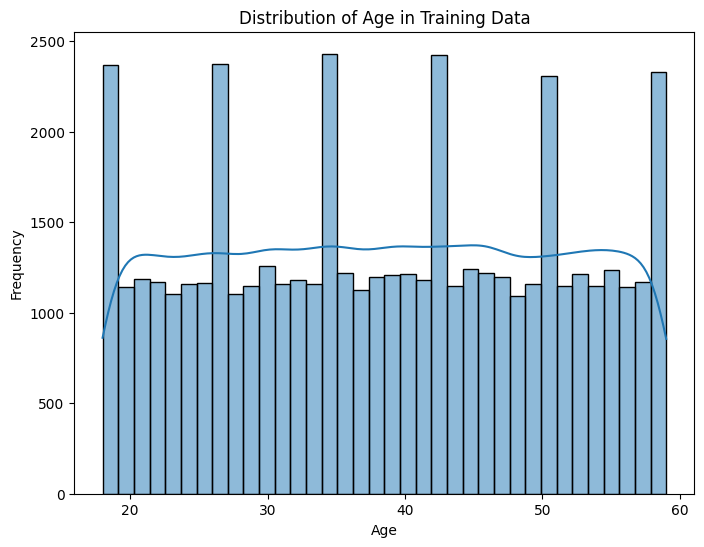

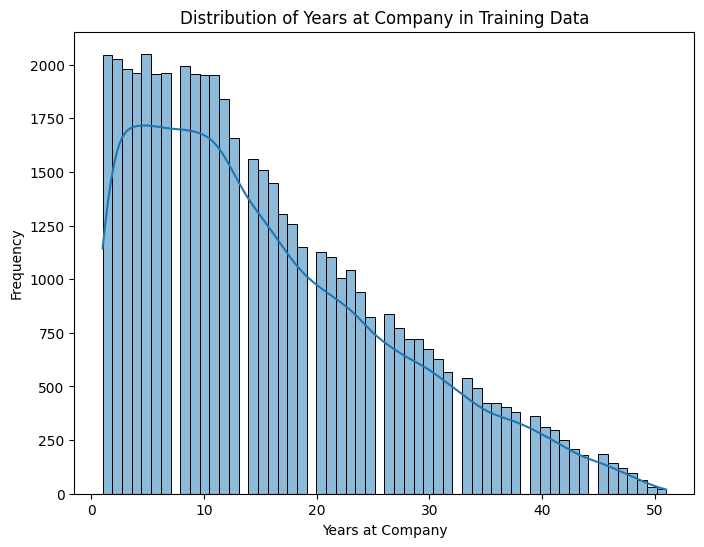

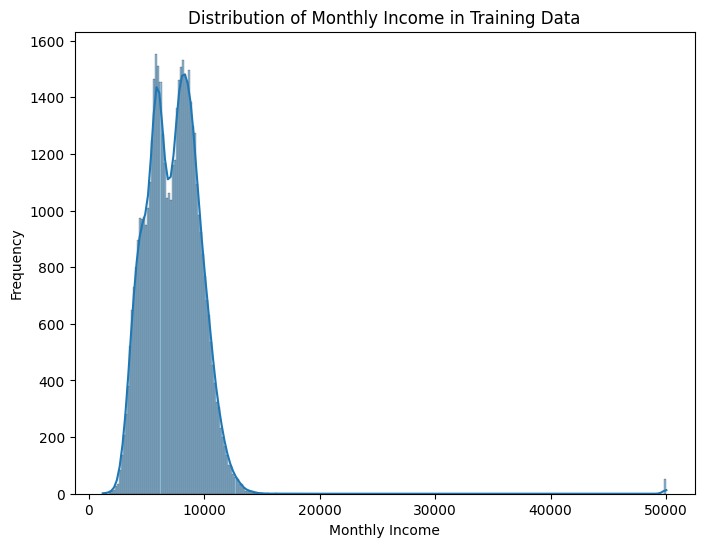

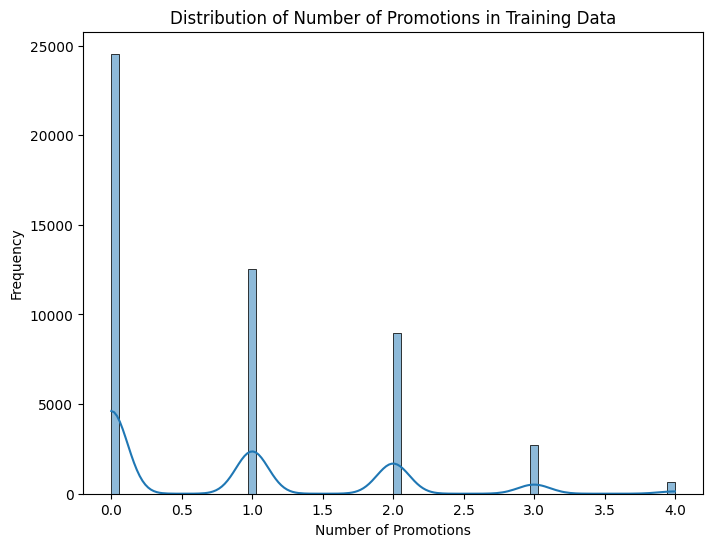

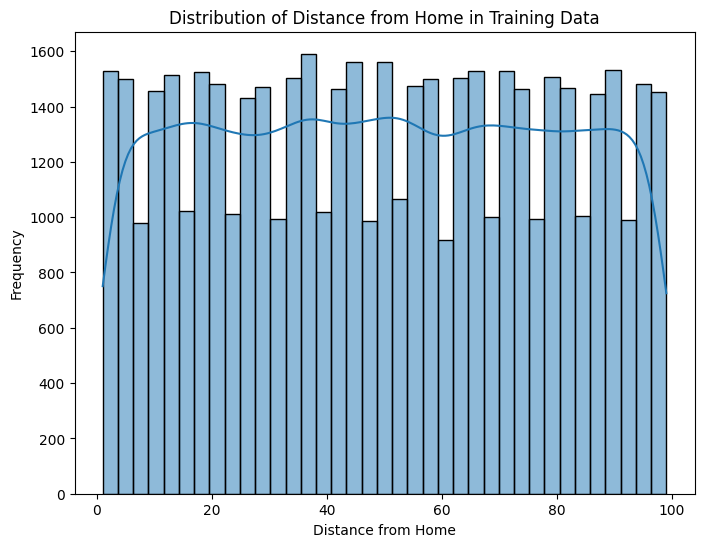

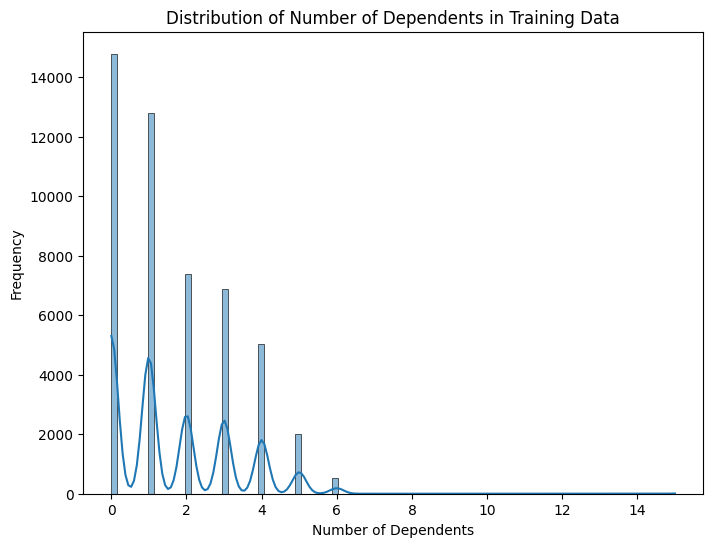

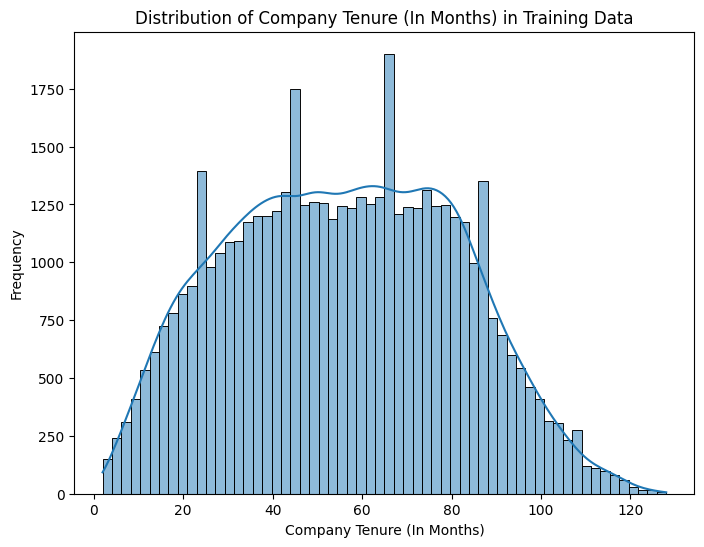

In [32]:
# Plot all the numerical columns to understand their distribution

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_cols_train:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=X_train, x=col, kde=True)
    plt.title(f'Distribution of {col} in Training Data')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months)
Age,1.000000,0.535486,-0.005585,0.004905,-0.005594,0.004340,0.236568
Years at Company,0.535486,1.000000,-0.007207,-0.000719,-0.002825,0.003188,0.444810
Monthly Income,-0.005585,-0.007207,1.000000,0.001904,-0.001794,-0.005513,-0.008125
Number of Promotions,0.004905,-0.000719,0.001904,1.000000,-0.006778,0.000345,0.004715
Distance from Home,-0.005594,-0.002825,-0.001794,-0.006778,1.000000,-0.002366,-0.006634
Number of Dependents,0.004340,0.003188,-0.005513,0.000345,-0.002366,1.000000,0.000674
Company Tenure (In Months),0.236568,0.444810,-0.008125,0.004715,-0.006634,0.000674,1.000000


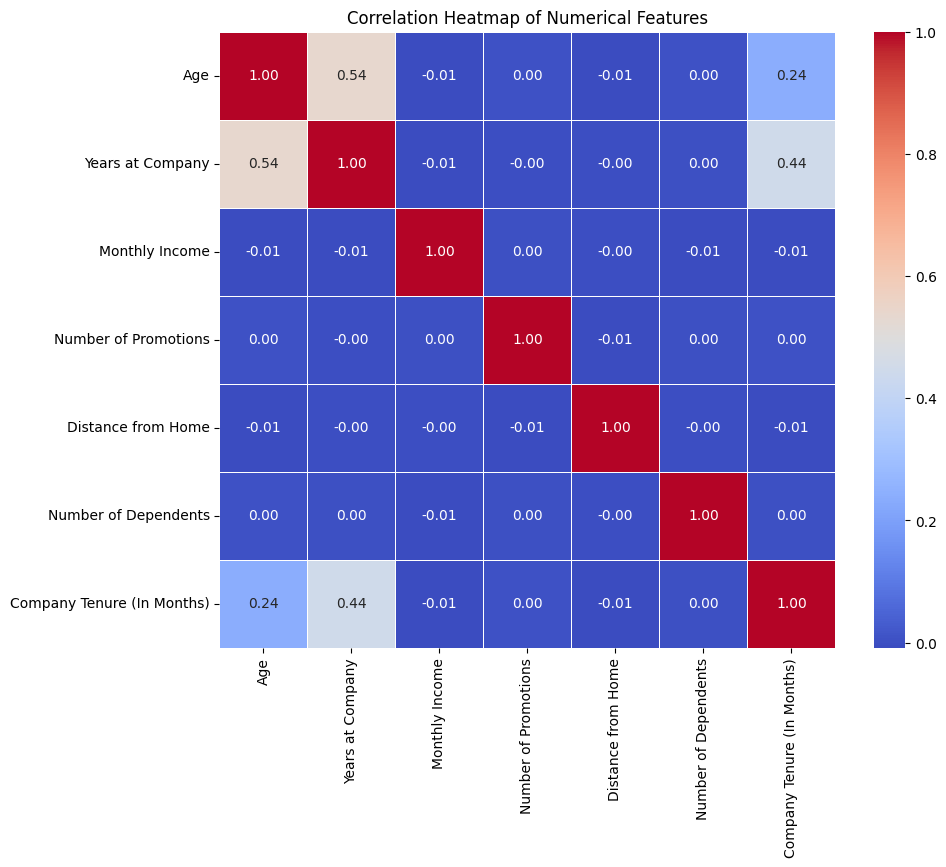

In [33]:
# Create correlation matrix for numerical columns
correlation_matrix = X_train[numerical_cols_train].corr()
display(correlation_matrix)

# Plot Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

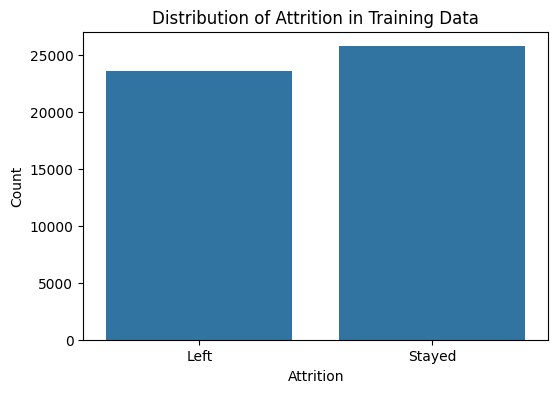

In [34]:
# Plot a bar chart to check class balance
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title('Distribution of Attrition in Training Data')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

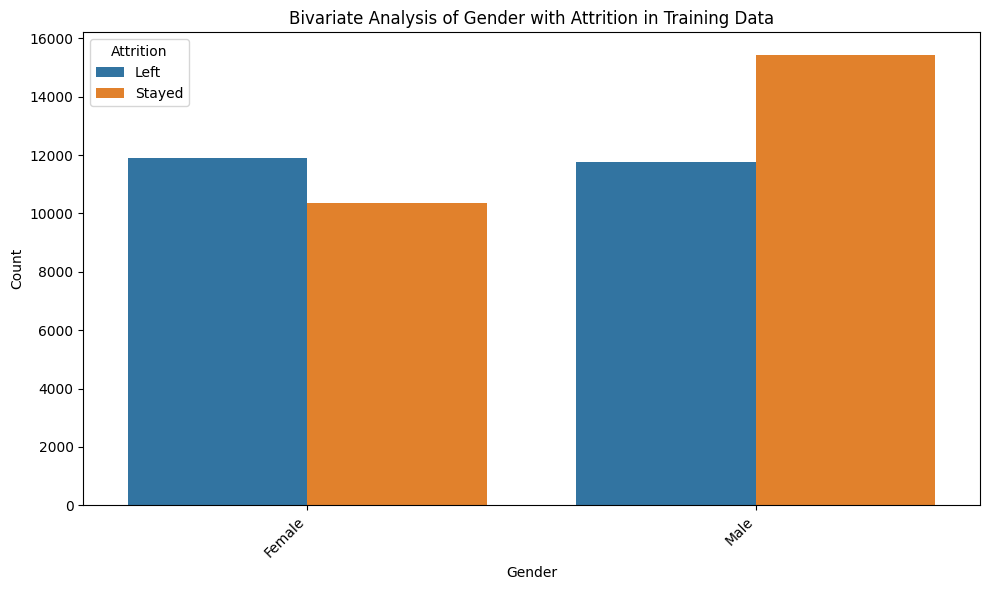

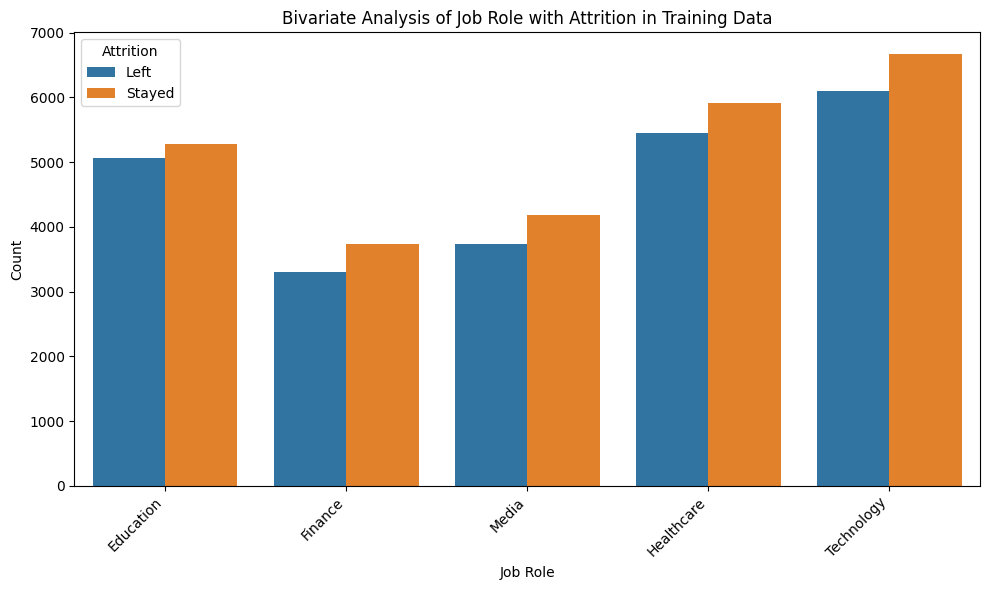

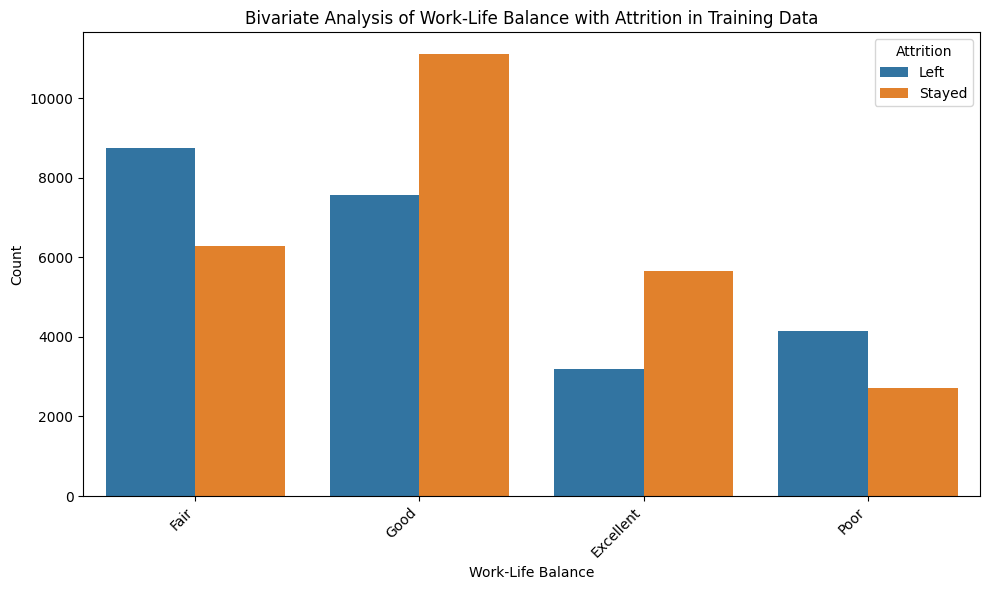

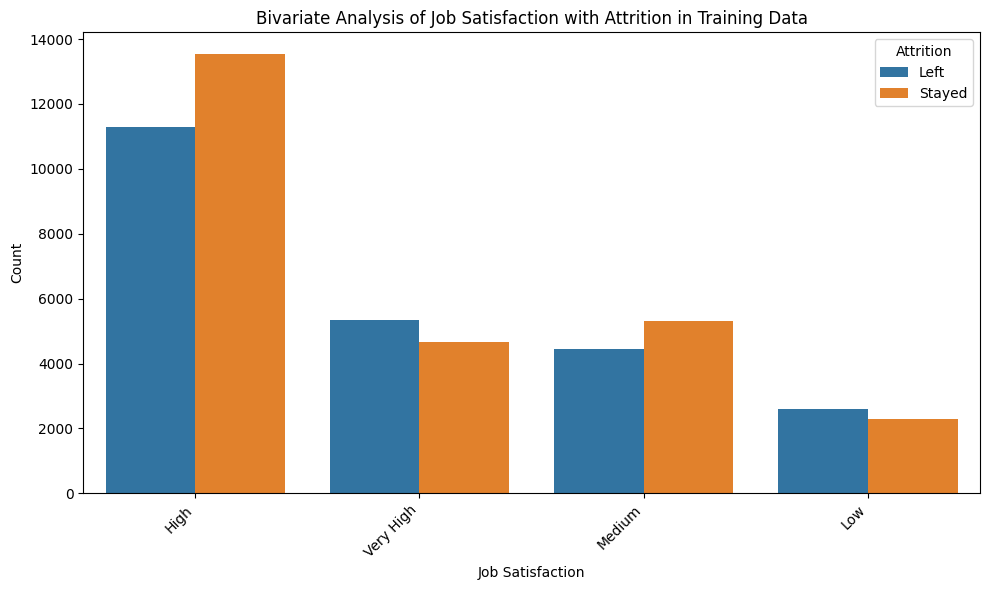

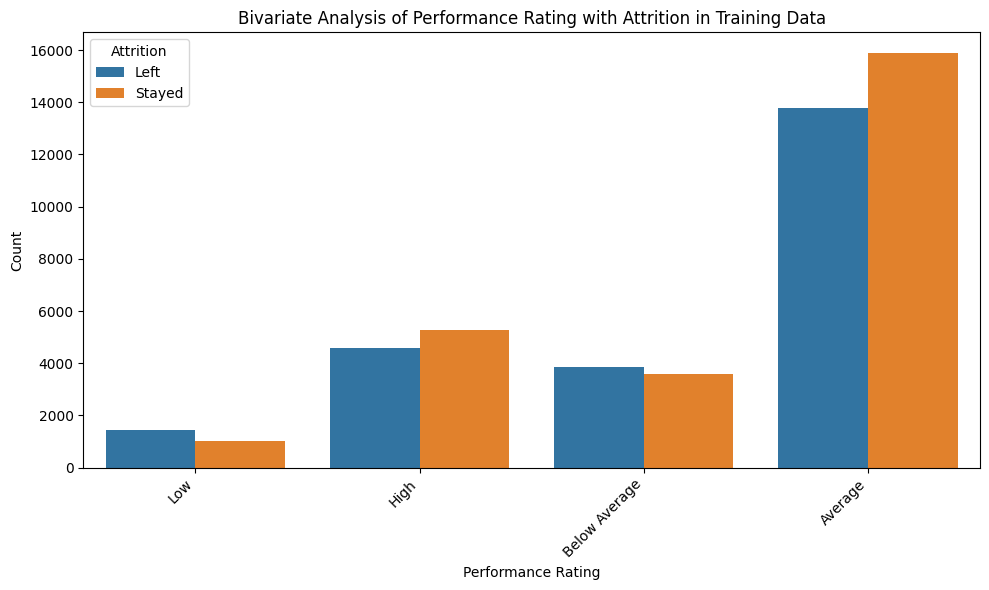

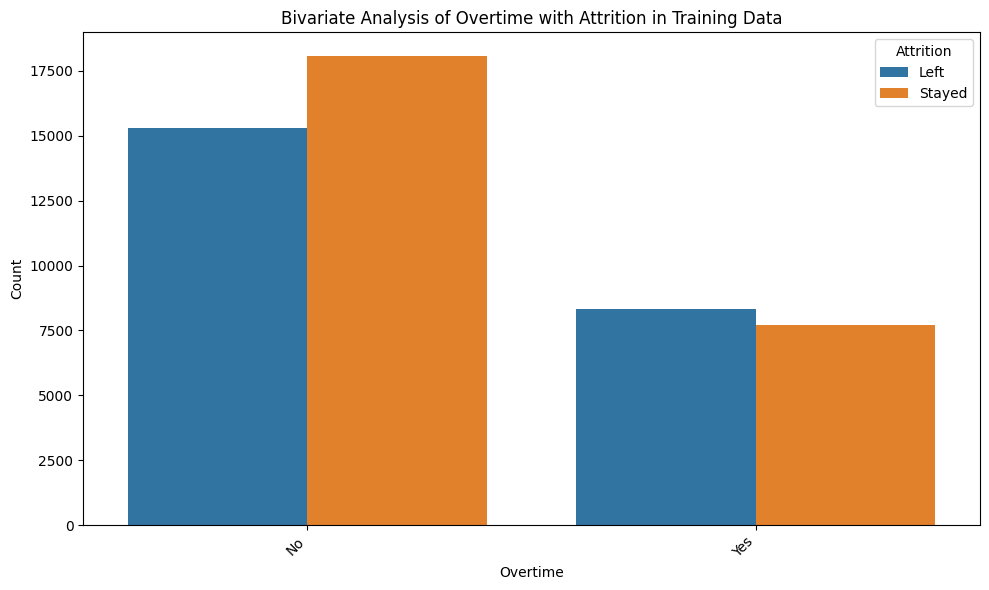

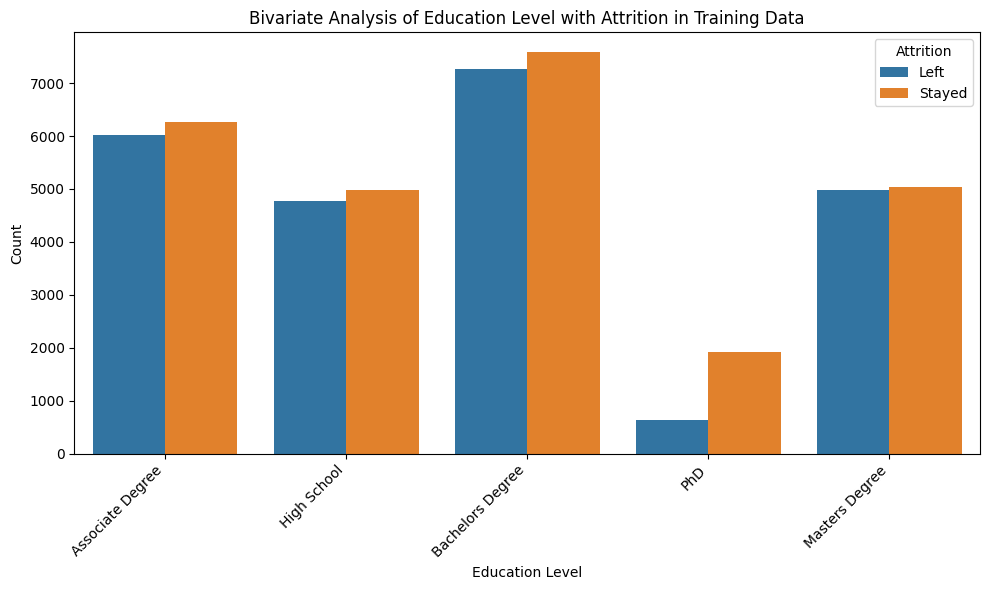

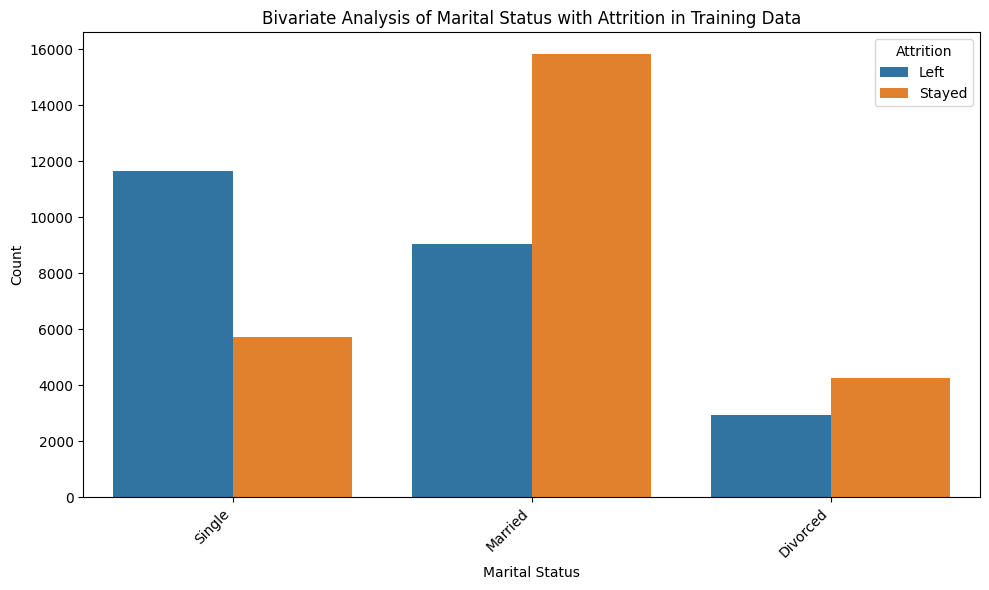

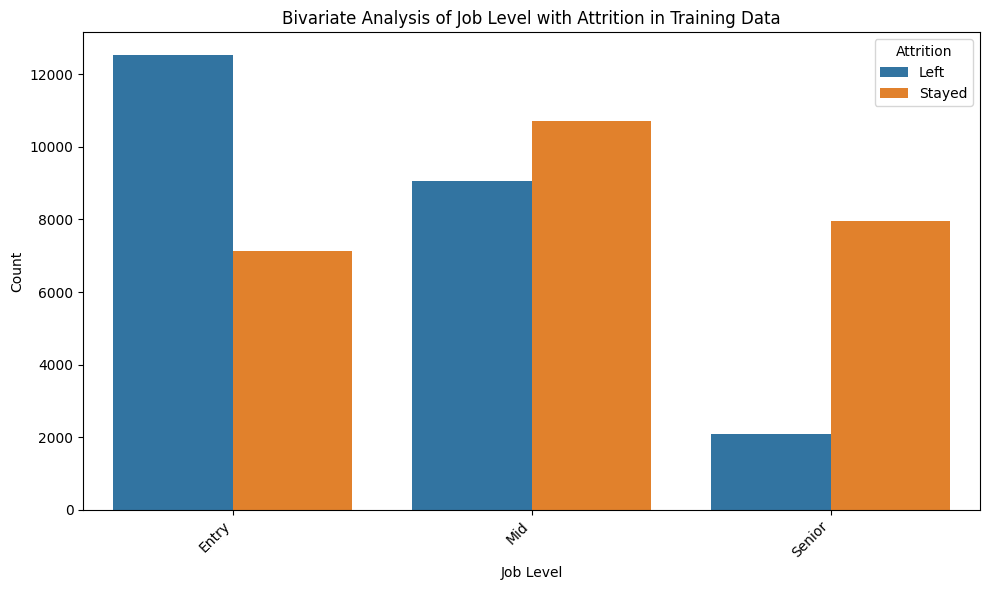

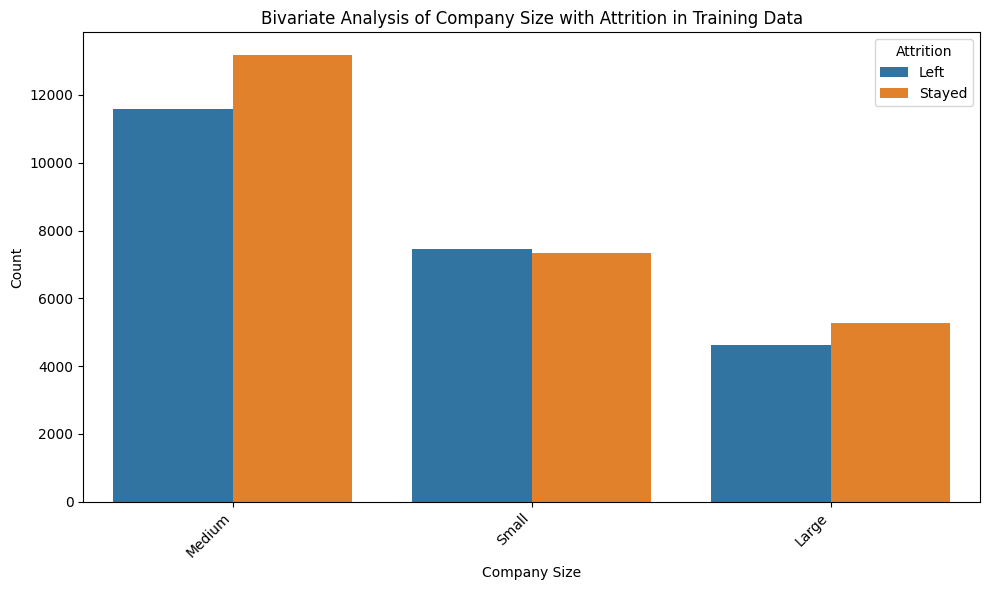

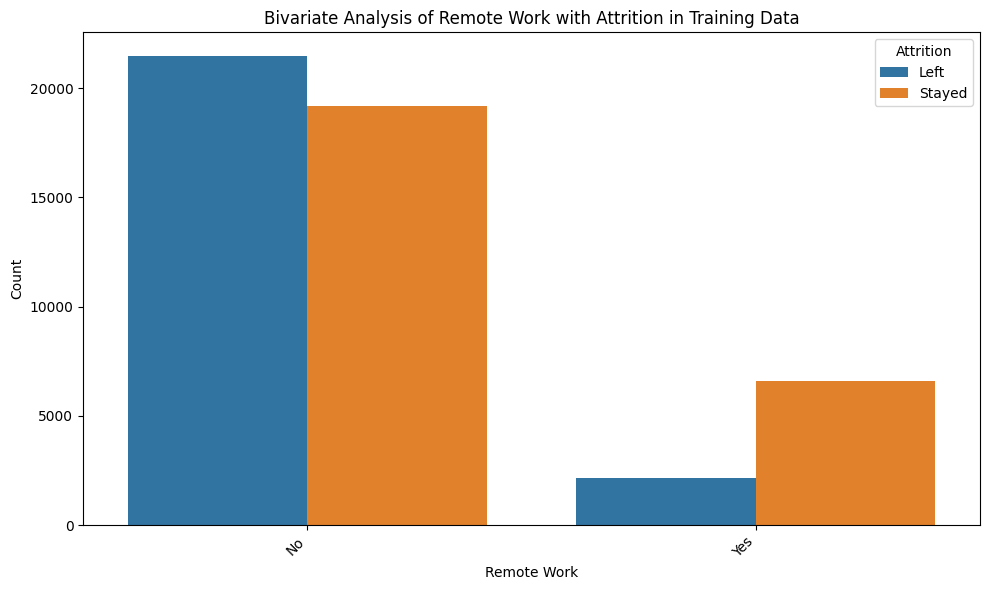

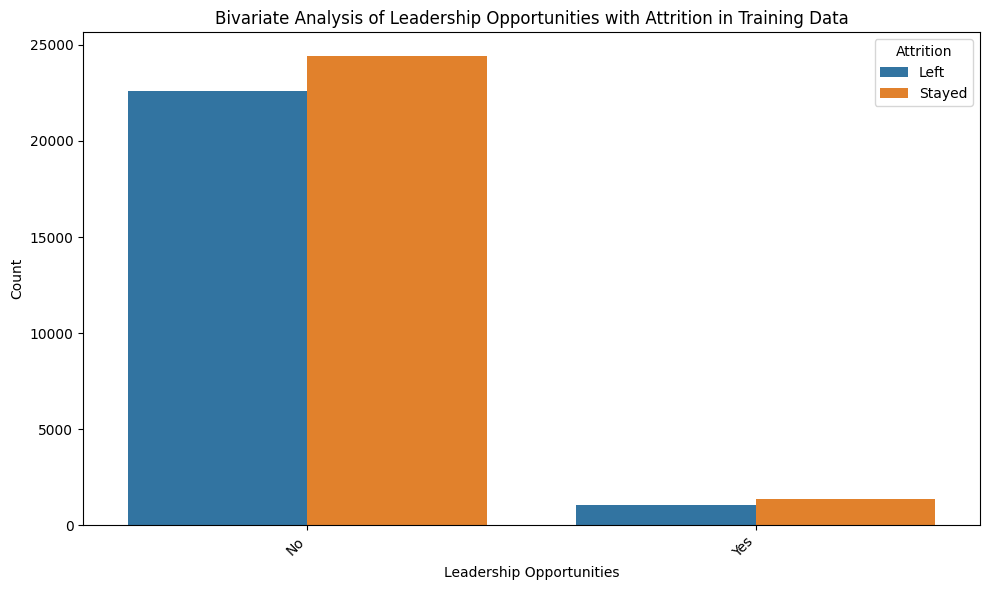

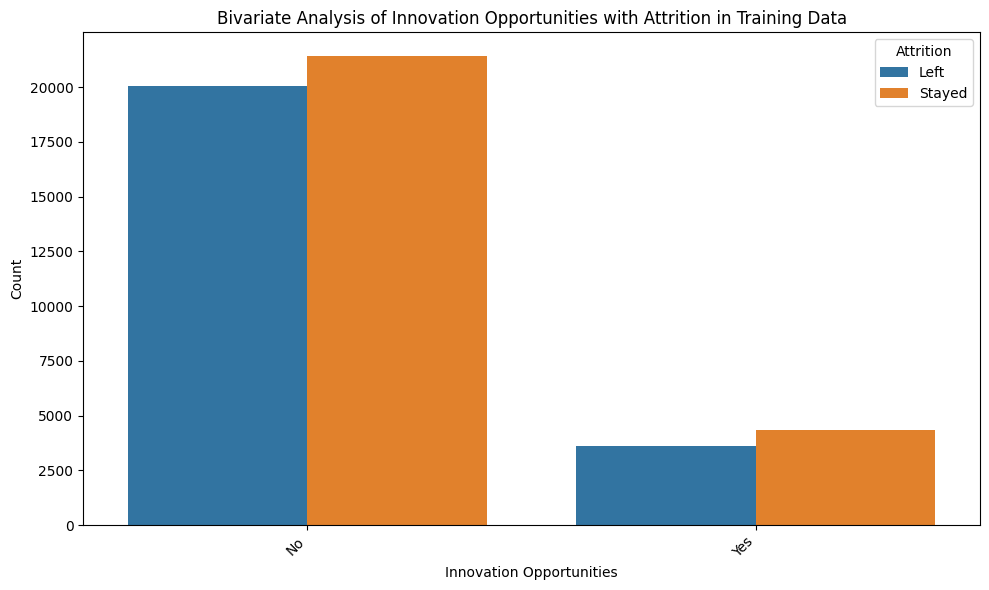

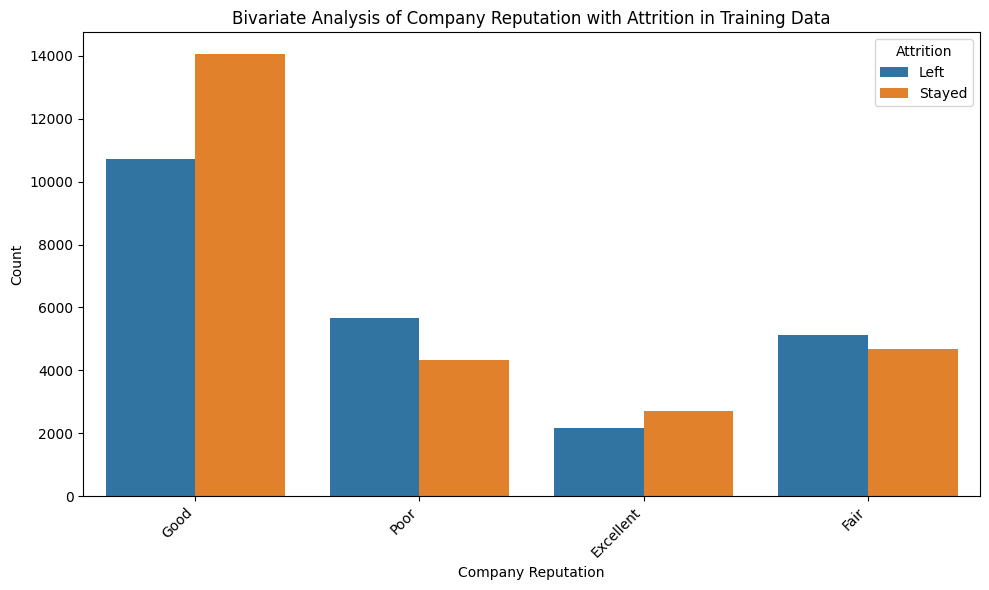

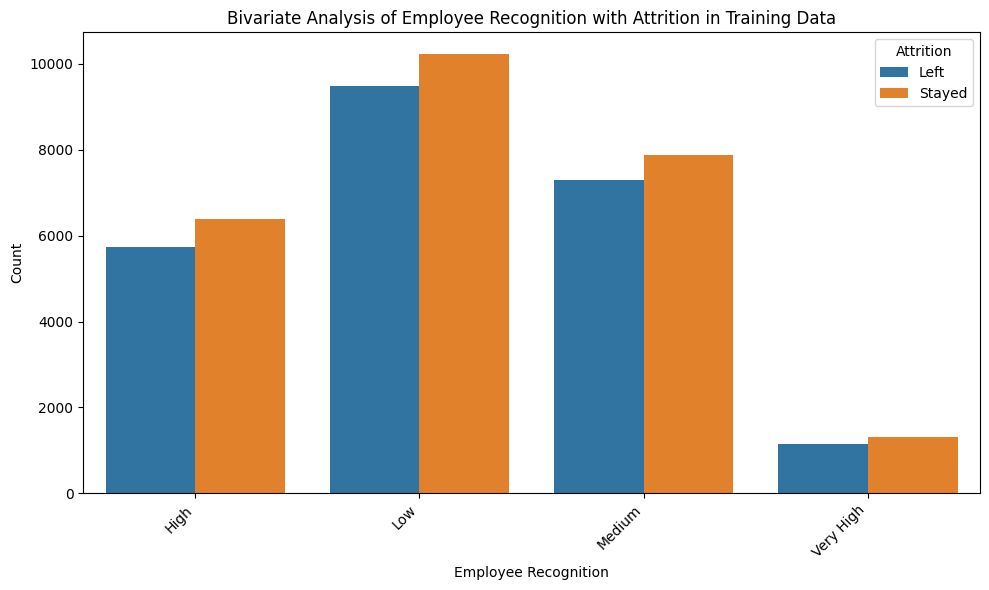

In [35]:
# Plot distribution for each categorical column with target variable
categorical_cols_train = X_train.select_dtypes(include='object').columns.tolist()

for col in categorical_cols_train:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=X_train.assign(Attrition=y_train), x=col, hue='Attrition')
    plt.title(f'Bivariate Analysis of {col} with Attrition in Training Data')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [36]:
numerical_cols_test = X_test.select_dtypes(include= np.number).columns.tolist()
numerical_cols_test

['Age',
 'Years at Company',
 'Monthly Income',
 'Number of Promotions',
 'Distance from Home',
 'Number of Dependents',
 'Company Tenure (In Months)']

5.1.2 Plot distribution of numerical columns

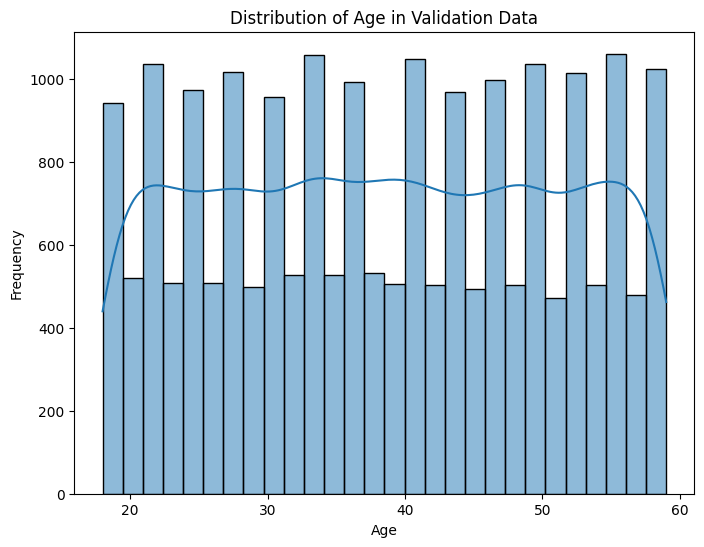

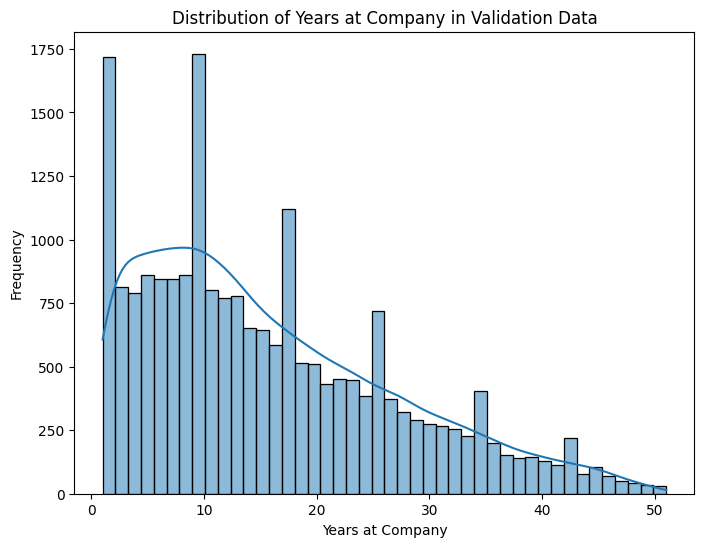

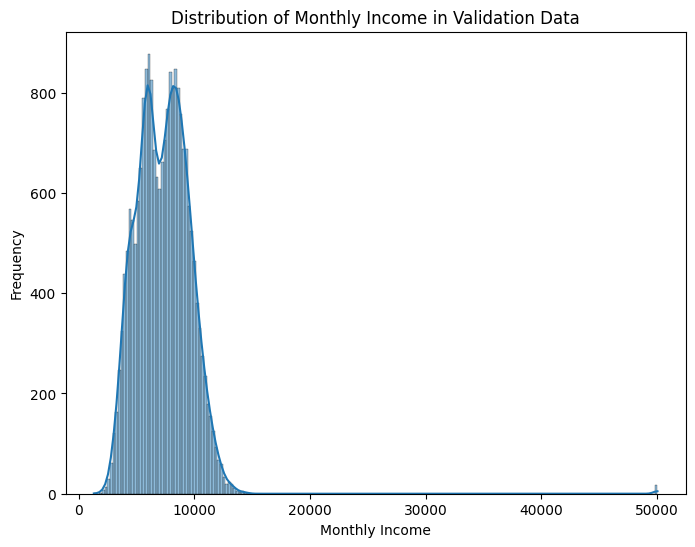

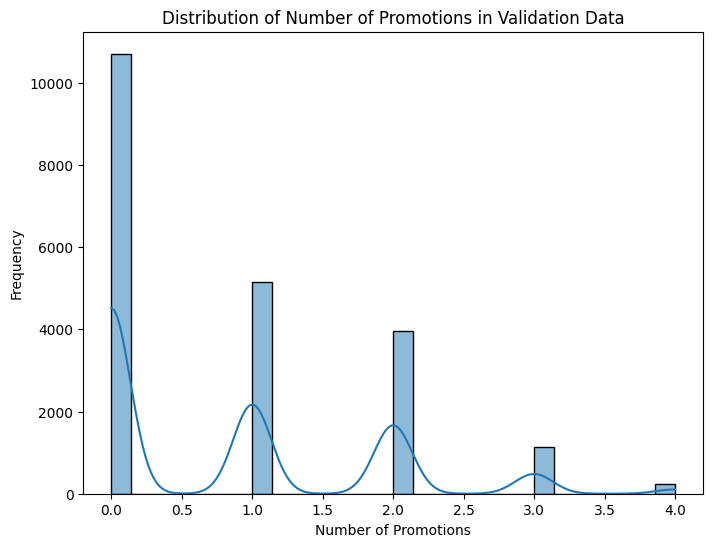

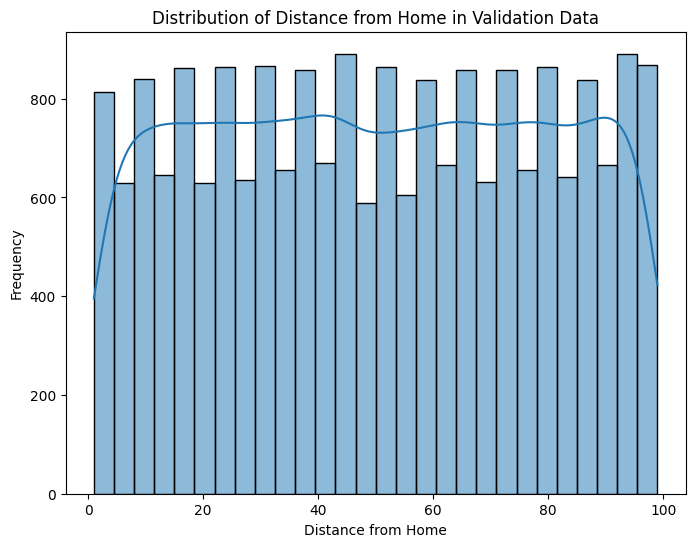

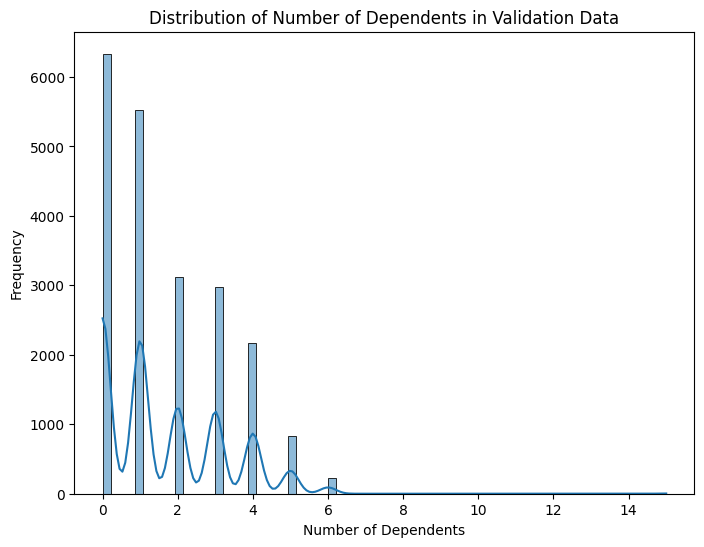

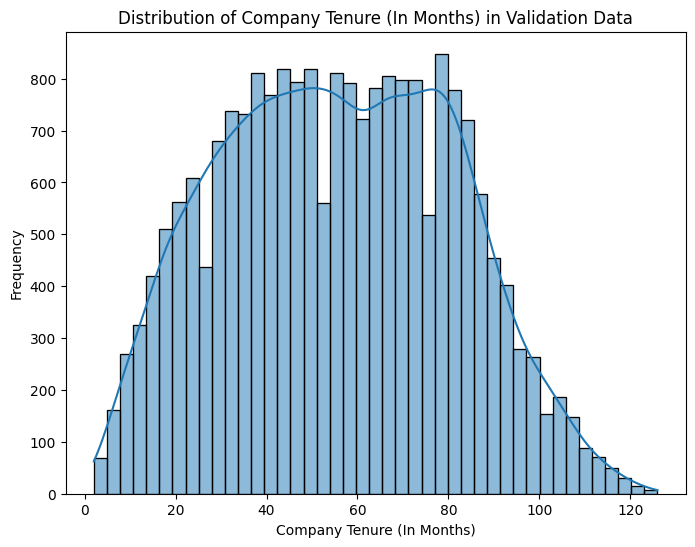

In [37]:
# Plot all the numerical columns to understand their distribution
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_cols_test:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=X_test, x=col, kde=True)
    plt.title(f'Distribution of {col} in Validation Data')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months)
Age,1.000000,0.539387,-0.000566,-0.010176,-0.004707,-0.000856,0.235618
Years at Company,0.539387,1.000000,-0.010204,0.005712,-0.011369,0.005814,0.437715
Monthly Income,-0.000566,-0.010204,1.000000,0.002097,-0.002003,0.005320,-0.018976
Number of Promotions,-0.010176,0.005712,0.002097,1.000000,-0.009019,-0.009845,0.006610
Distance from Home,-0.004707,-0.011369,-0.002003,-0.009019,1.000000,0.004286,-0.004040
Number of Dependents,-0.000856,0.005814,0.005320,-0.009845,0.004286,1.000000,-0.006286
Company Tenure (In Months),0.235618,0.437715,-0.018976,0.006610,-0.004040,-0.006286,1.000000


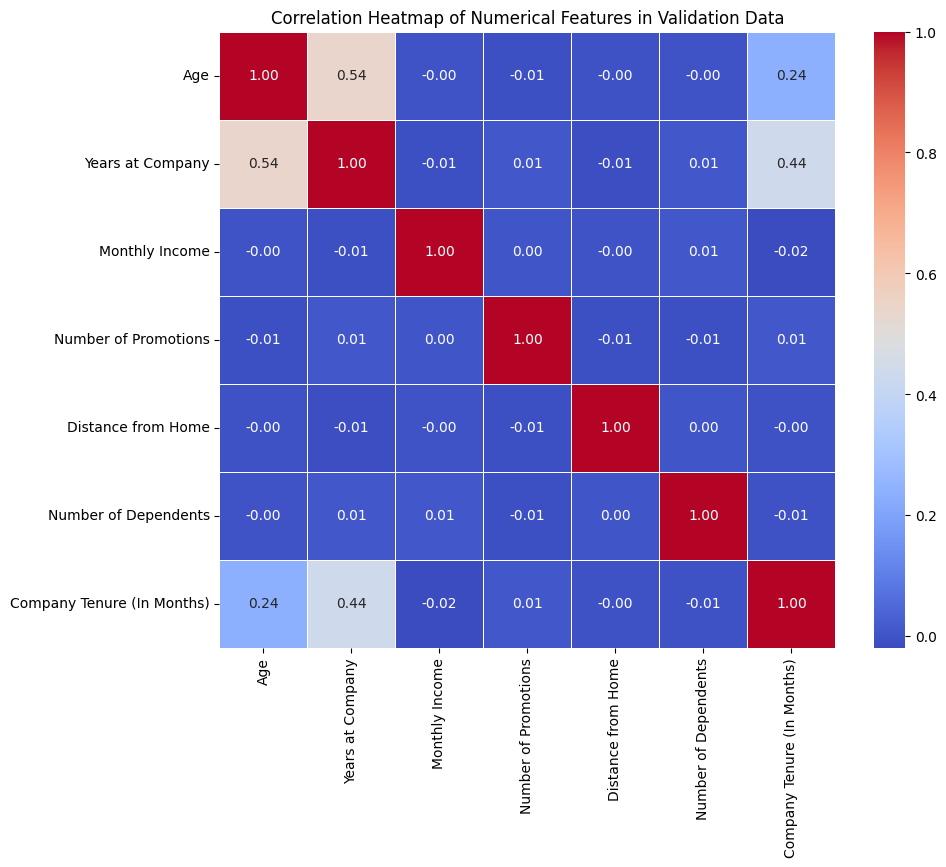

In [38]:
# Create correlation matrix for numerical columns
correlation_matrix_test = X_test[numerical_cols_test].corr()
display(correlation_matrix_test)

# Plot Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_test, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features in Validation Data')
plt.show()

### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

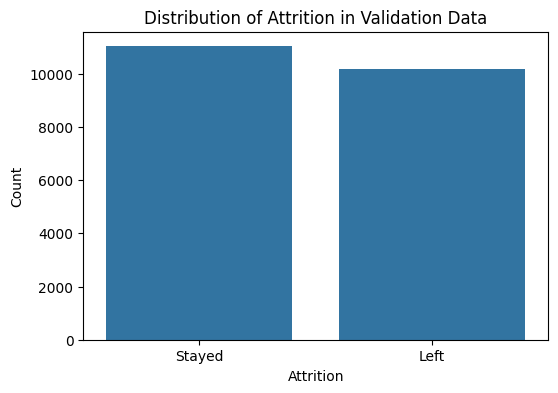

In [39]:
# Plot a bar chart to check class balance
plt.figure(figsize=(6, 4))
sns.countplot(x=y_test)
plt.title('Distribution of Attrition in Validation Data')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

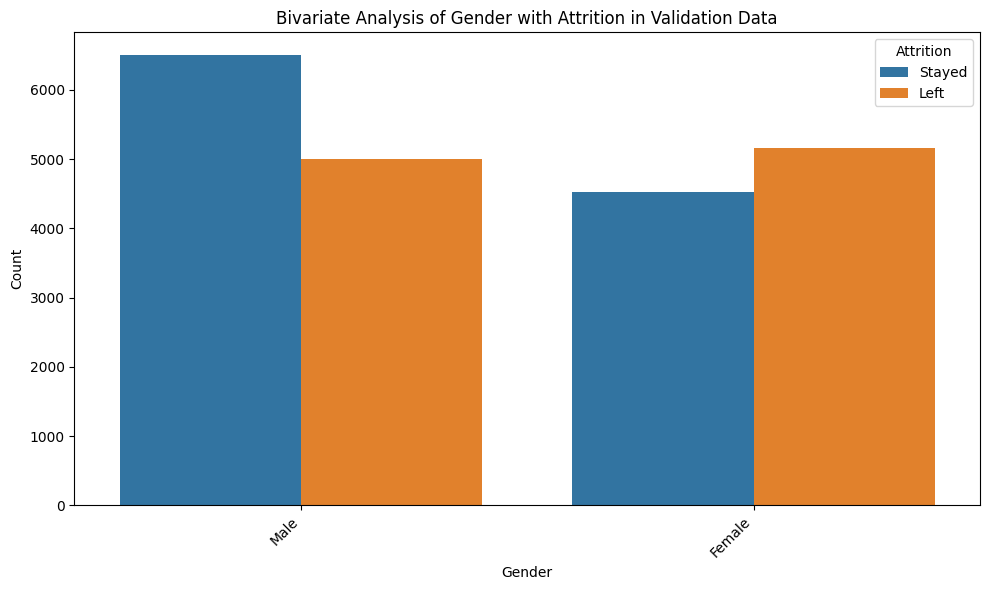

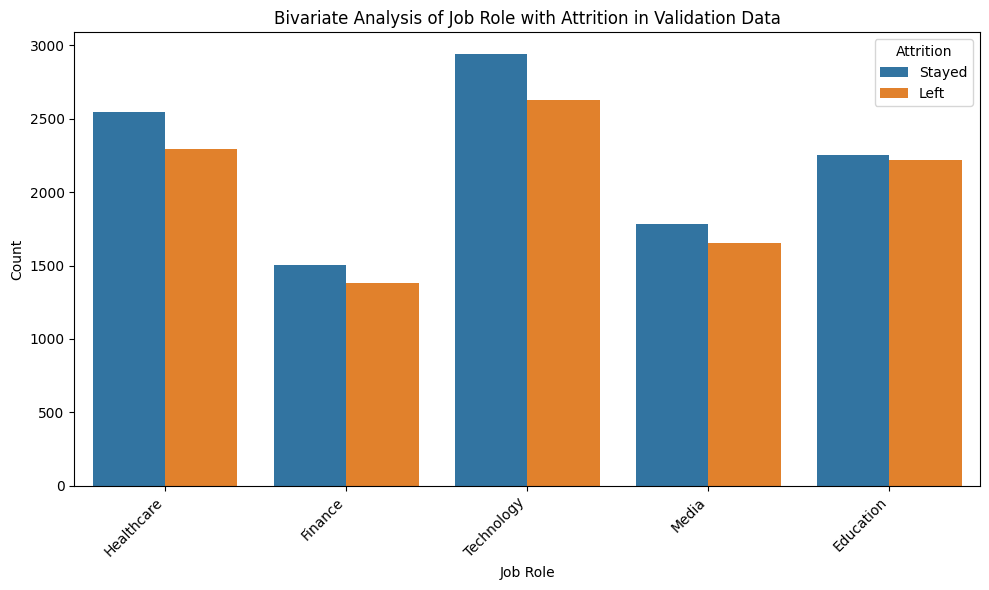

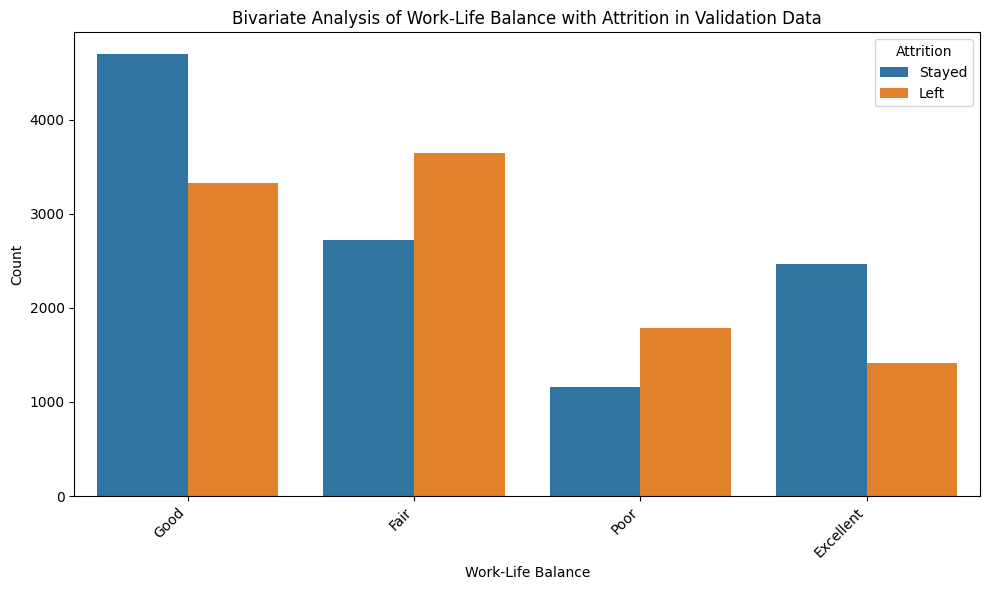

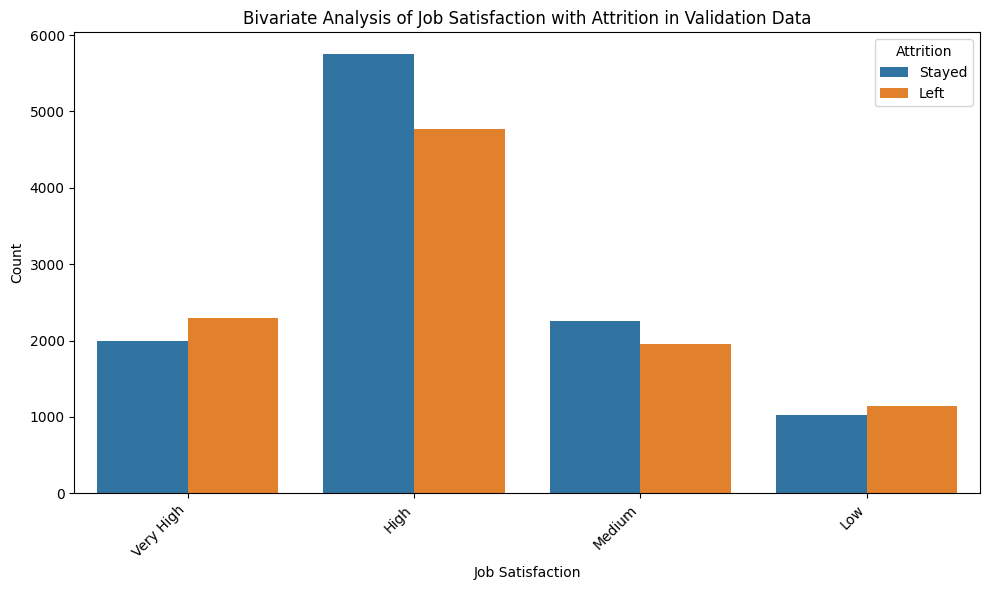

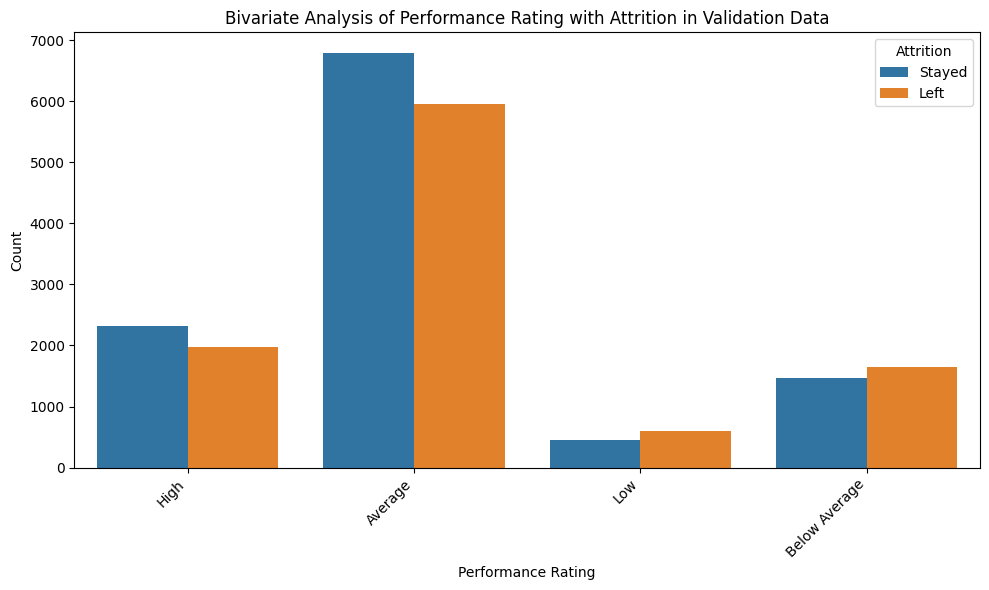

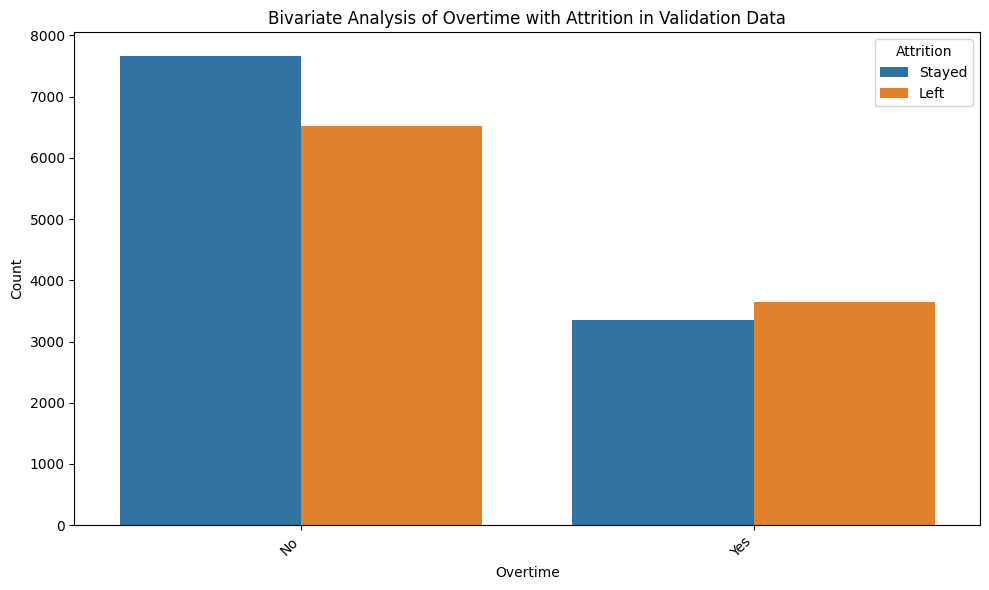

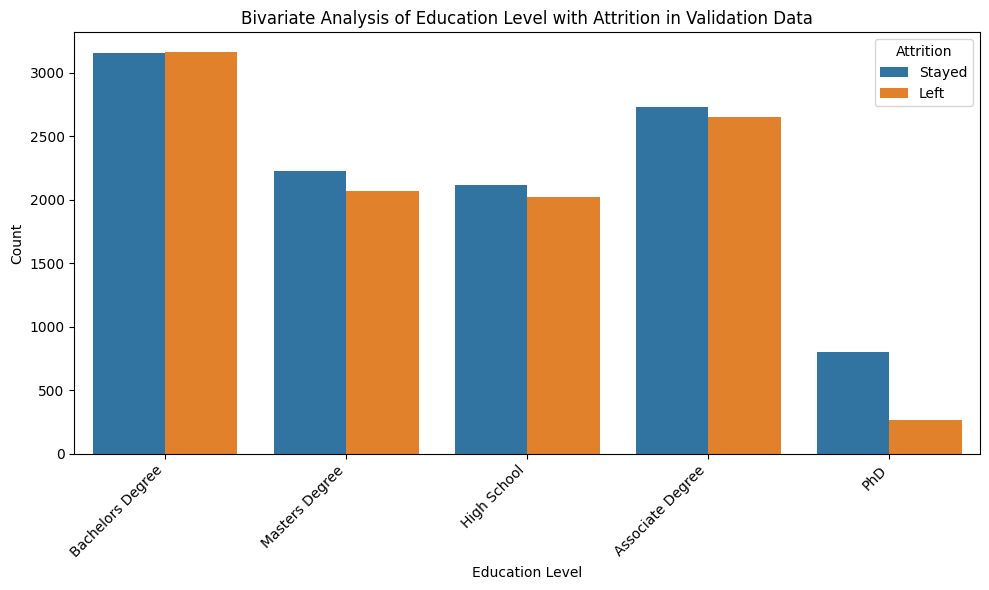

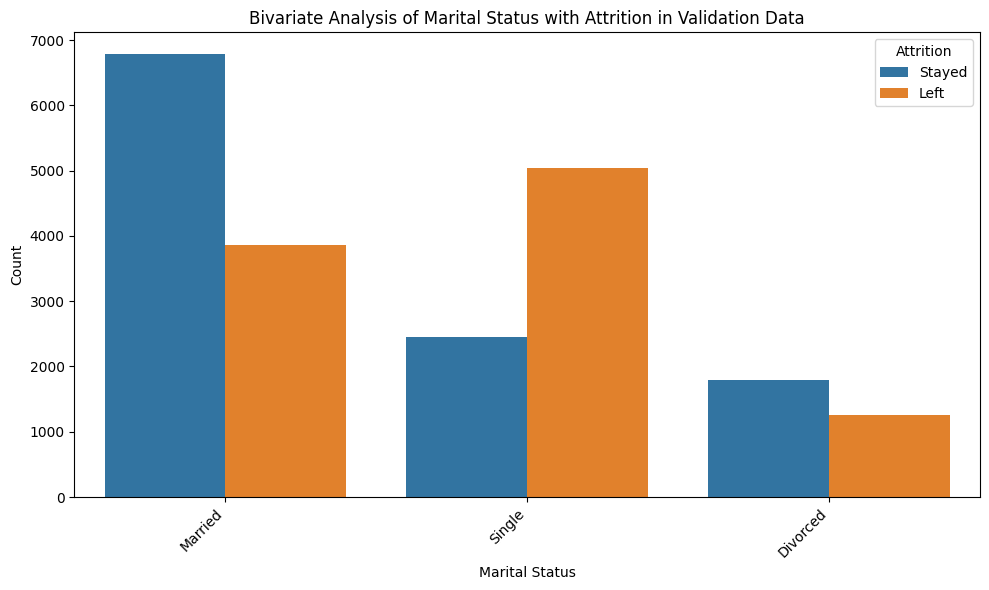

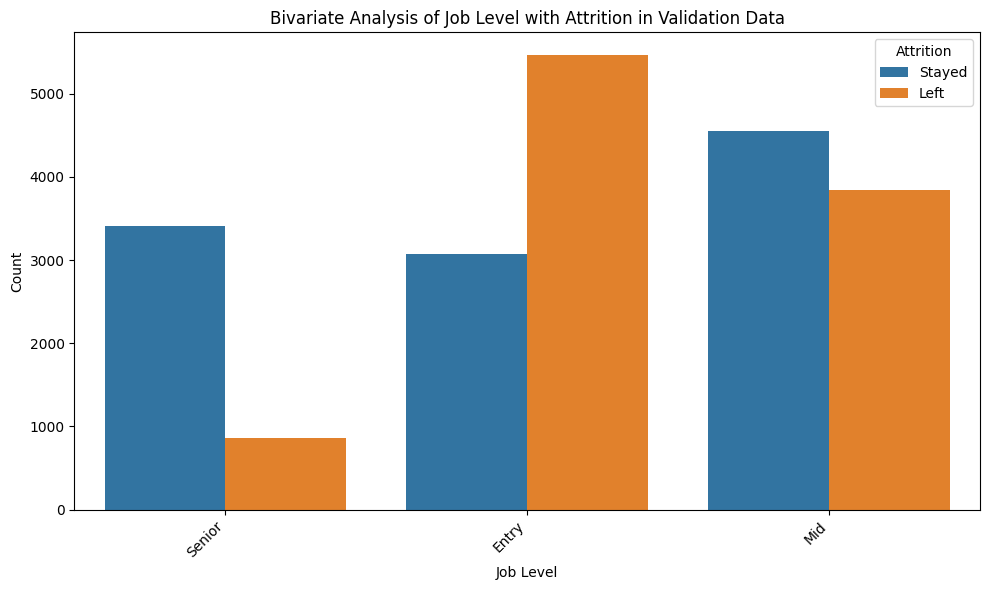

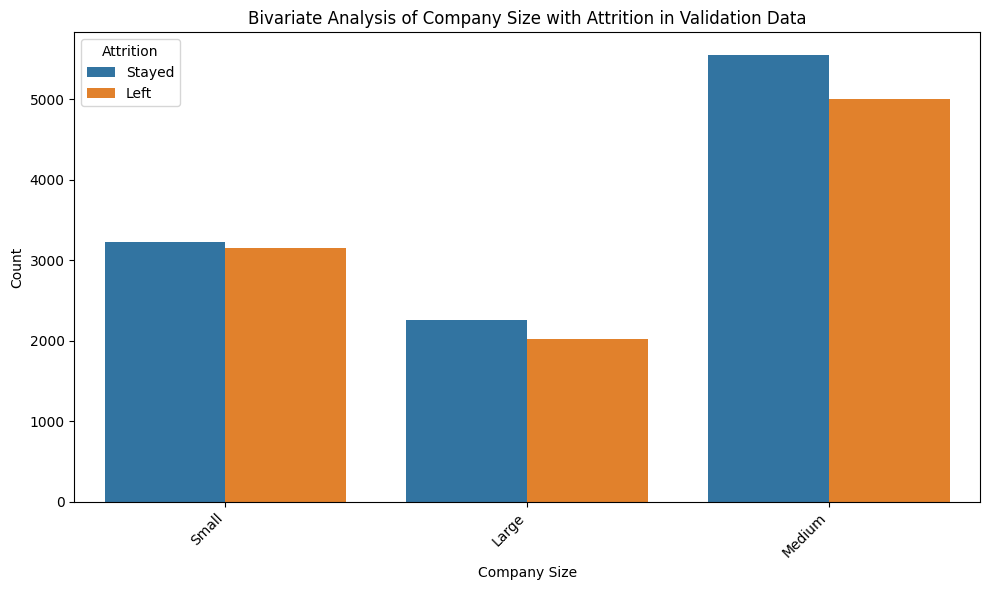

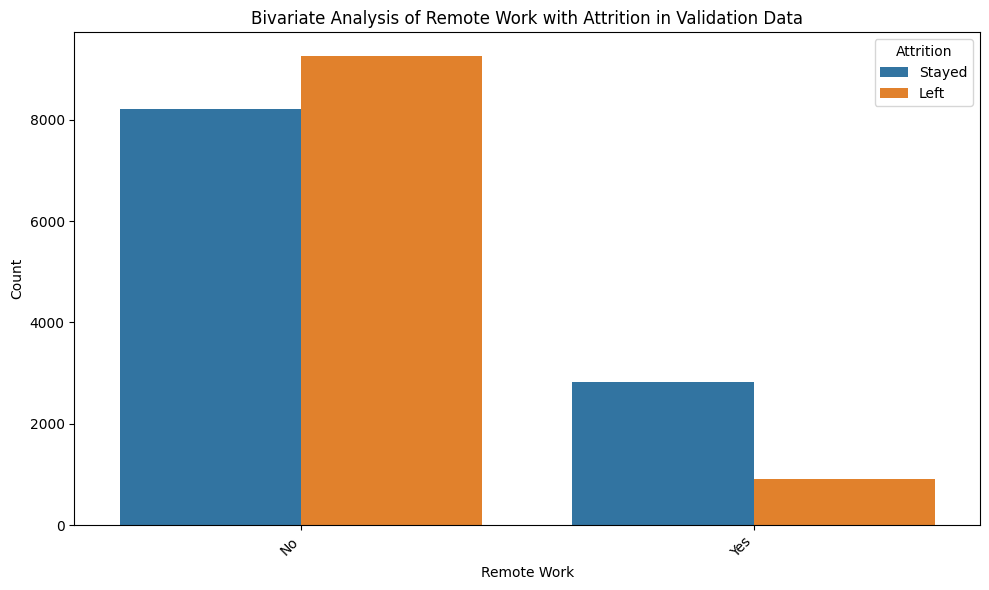

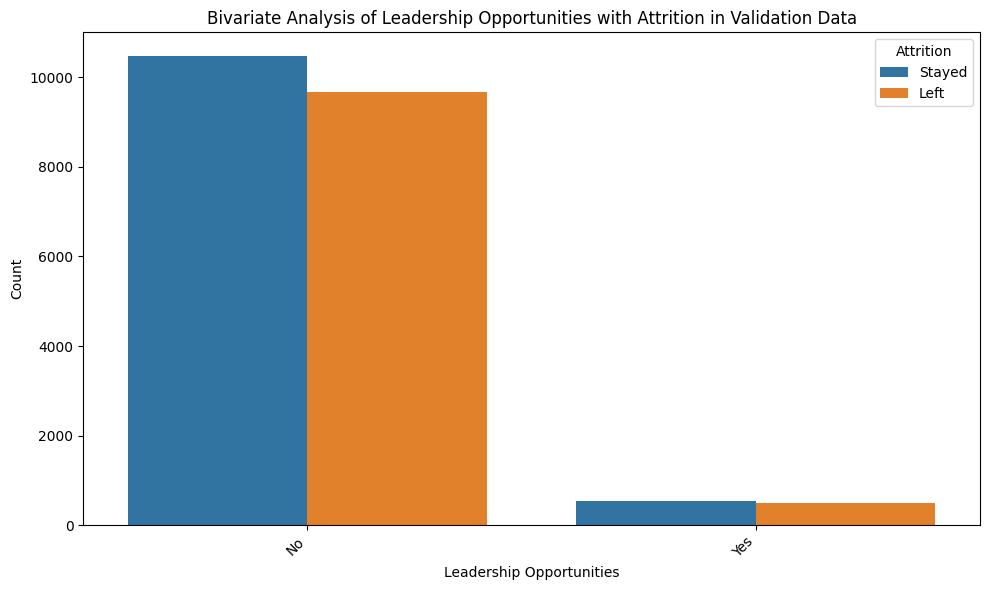

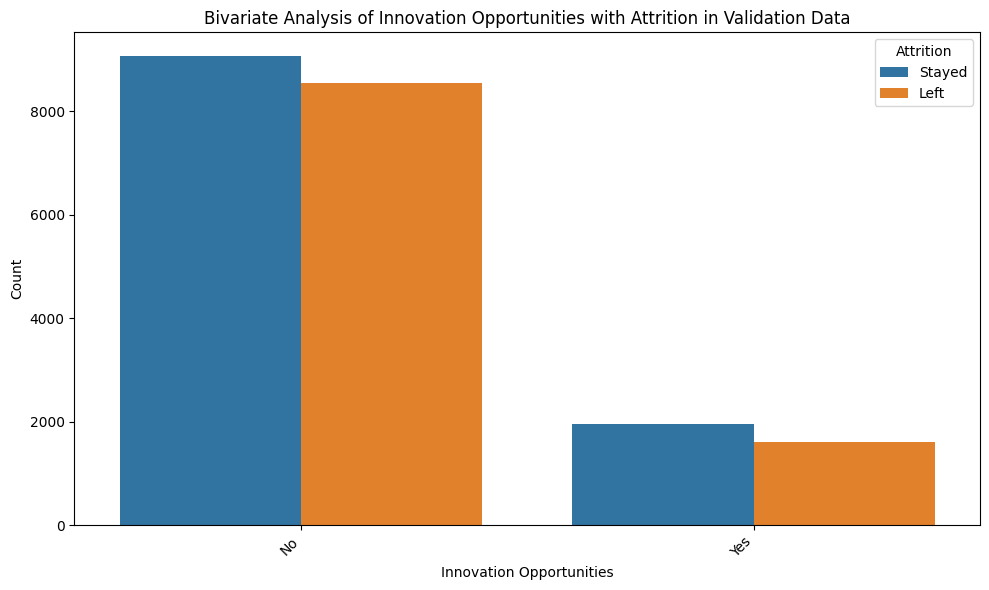

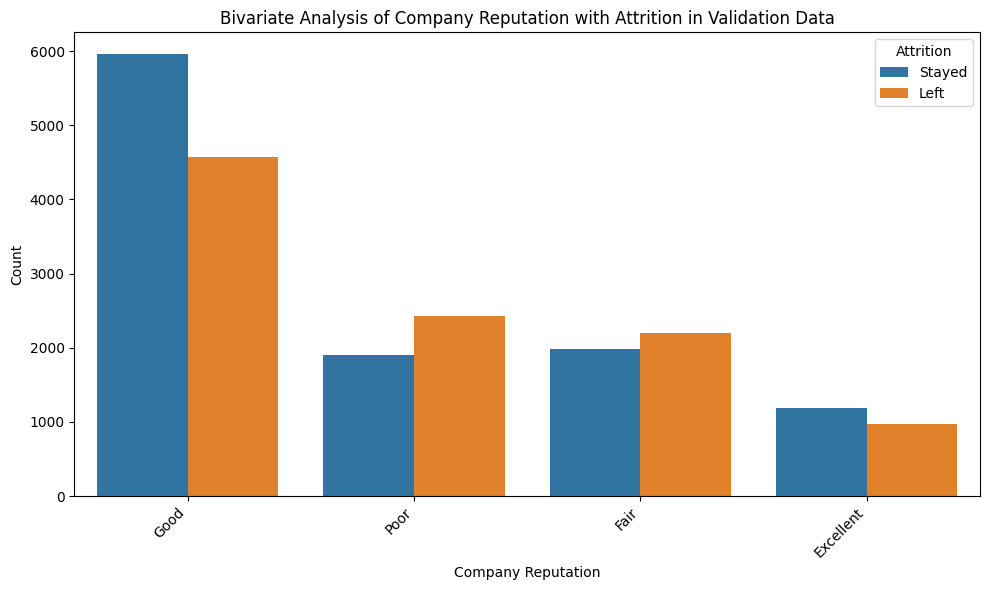

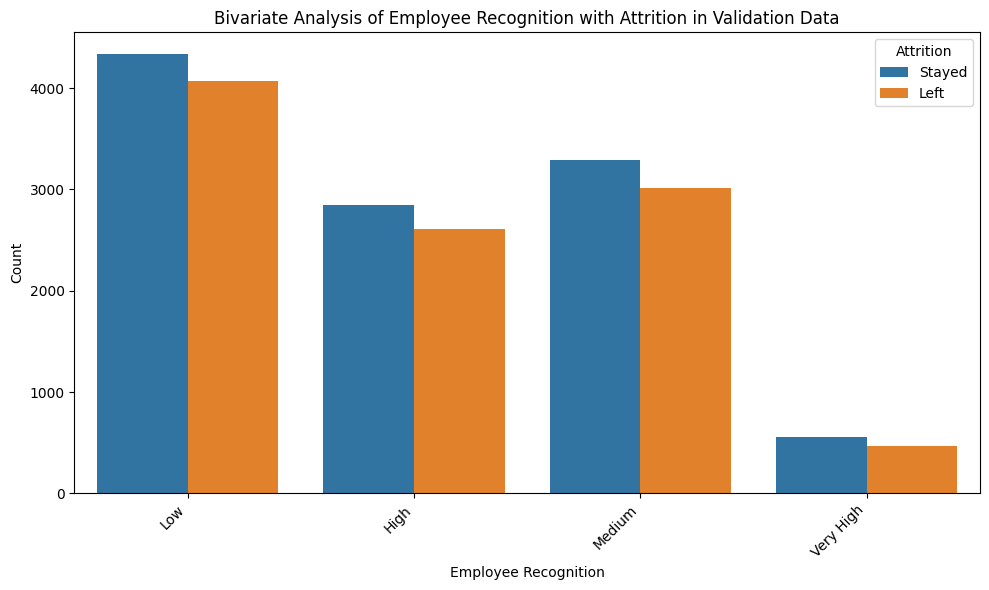

In [40]:
# Plot distribution for each categorical column with target variable
categorical_cols_test = X_test.select_dtypes(include='object').columns.tolist()
for col in categorical_cols_test:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=X_test.assign(Attrition=y_test), x=col, hue='Attrition')
    plt.title(f'Bivariate Analysis of {col} with Attrition in Validation Data')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [41]:
# Check the categorical columns
categorical_cols_train = X_train.select_dtypes(include='object').columns.tolist()
print(categorical_cols_train)

['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']


6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [42]:
# Create dummy variables using the 'get_dummies' for independent columns
X_train_dummies = pd.get_dummies(X_train[categorical_cols_train], drop_first=True)

# Add the results to the master DataFrame
X_train = pd.concat([X_train, X_train_dummies], axis=1)

Now, drop the original categorical columns and check the DataFrame

In [43]:
# Drop the original categorical columns and check the DataFrame
X_train = X_train.drop(categorical_cols_train, axis=1)

display(X_train.head())

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Gender_Male,Job Role_Finance,Job Role_Healthcare,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
41465,46,26,4617,2,59.0,2,92.0,False,False,False,...,False,False,False,False,False,True,False,False,False,False
69350,43,26,4447,3,64.0,0,103.0,True,False,False,...,True,False,False,True,False,False,True,True,False,False
28247,27,8,9762,0,84.0,1,16.0,True,True,False,...,False,False,False,True,False,True,False,True,False,False
3217,47,29,5244,2,59.0,1,74.0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
73636,25,10,4455,0,36.0,0,62.0,False,False,False,...,False,False,False,False,False,True,False,False,True,False


6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [44]:
# Create dummy variables using 'get_dummies' for independent columns
X_test_dummies = pd.get_dummies(X_test[categorical_cols_train], drop_first=True)

# Concatenate the dummy variables with X_test
X_test = pd.concat([X_test, X_test_dummies], axis=1)

Now, drop the original categorical columns and check the DataFrame

In [45]:
# Drop the original categorical columns from X_test
X_test = X_test.drop(columns=categorical_cols_train)

# Check the first few rows of the updated X_test
display(X_test.head())

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Gender_Male,Job Role_Finance,Job Role_Healthcare,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
23813,46,1,7740,3,78.0,2,3.0,True,False,True,...,True,False,False,False,False,True,False,True,False,False
14537,32,6,8779,1,91.0,0,35.0,True,True,False,...,False,True,False,False,False,False,True,False,False,False
45192,53,10,11683,1,71.0,1,39.0,True,False,False,...,False,False,False,False,False,True,False,False,True,False
13765,50,2,7305,2,71.0,1,3.0,False,False,False,...,False,False,False,True,True,False,False,False,False,False
3411,48,24,10114,0,2.0,1,64.0,True,False,True,...,False,False,False,False,False,False,False,False,False,False


6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [46]:
# Convert y_train and y_validation to DataFrame to create dummy variables
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [47]:
# Create dummy variables for dependent column in training set
# We want 'Stayed' to be 1 and 'Left' to be 0.
y_train_dummies = y_train['Attrition'].apply(lambda x: 1 if x == 'Stayed' else 0)
y_train_dummies = pd.DataFrame(y_train_dummies)
y_train_dummies.columns = ['Attrition_Stayed']

6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [48]:
# Create dummy variables for dependent column in validation set
# We want 'Stayed' to be 1 and 'Left' to be 0.
y_test_dummies = y_test['Attrition'].apply(lambda x: 1 if x == 'Stayed' else 0)
y_test_dummies = pd.DataFrame(y_test_dummies)
y_test_dummies.columns = ['Attrition_Stayed']

6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [49]:
# Drop redundant columns from both train and validation
# This step is no longer necessary as categorical columns were handled and the target variable is kept.

### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [50]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import StandardScaler

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [51]:
# Scale the numeric features present in the training set
scaler = StandardScaler()
X_train[numerical_cols_train] = scaler.fit_transform(X_train[numerical_cols_train])

# Scale the numerical features present in the validation set
X_test[numerical_cols_test] = scaler.transform(X_test[numerical_cols_test])

## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [52]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [53]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train_dummies)

In [54]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Age', np.False_, np.int64(11)),
 ('Years at Company', np.False_, np.int64(9)),
 ('Monthly Income', np.False_, np.int64(24)),
 ('Number of Promotions', np.False_, np.int64(4)),
 ('Distance from Home', np.False_, np.int64(2)),
 ('Number of Dependents', np.False_, np.int64(7)),
 ('Company Tenure (In Months)', np.False_, np.int64(27)),
 ('Gender_Male', np.True_, np.int64(1)),
 ('Job Role_Finance', np.False_, np.int64(14)),
 ('Job Role_Healthcare', np.False_, np.int64(16)),
 ('Job Role_Media', np.False_, np.int64(13)),
 ('Job Role_Technology', np.False_, np.int64(15)),
 ('Work-Life Balance_Fair', np.True_, np.int64(1)),
 ('Work-Life Balance_Good', np.False_, np.int64(3)),
 ('Work-Life Balance_Poor', np.True_, np.int64(1)),
 ('Job Satisfaction_Low', np.True_, np.int64(1)),
 ('Job Satisfaction_Medium', np.False_, np.int64(23)),
 ('Job Satisfaction_Very High', np.True_, np.int64(1)),
 ('Performance Rating_Below Average', np.True_, np.int64(1)),
 ('Performance Rating_High', np.False_, np.int

In [55]:
# Display the features selected by RFE
display(X_train.columns[rfe.support_])

Index(['Gender_Male', 'Work-Life Balance_Fair', 'Work-Life Balance_Poor',
       'Job Satisfaction_Low', 'Job Satisfaction_Very High',
       'Performance Rating_Below Average', 'Performance Rating_Low',
       'Overtime_Yes', 'Education Level_PhD', 'Marital Status_Single',
       'Job Level_Mid', 'Job Level_Senior', 'Remote Work_Yes',
       'Company Reputation_Fair', 'Company Reputation_Poor'],
      dtype='object')

7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [56]:
# Put columns selected by RFE into variable 'col'
col = X_train.columns[rfe.support_]

### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [57]:
# Select only the columns selected by RFE
X_train = X_train[col]

In [58]:
# View the training data
display(X_train.head())

,Gender_Male,Work-Life Balance_Fair,Work-Life Balance_Poor,Job Satisfaction_Low,Job Satisfaction_Very High,Performance Rating_Below Average,Performance Rating_Low,Overtime_Yes,Education Level_PhD,Marital Status_Single,Job Level_Mid,Job Level_Senior,Remote Work_Yes,Company Reputation_Fair,Company Reputation_Poor
41465,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False
69350,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True
28247,True,False,False,False,True,True,False,True,False,True,True,False,False,False,False
3217,False,True,False,False,False,False,False,True,True,False,True,False,False,False,False
73636,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [59]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)

7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [60]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
y_train_numeric = y_train_dummies['Attrition_Stayed'].astype(float)
X_train_sm = sm.add_constant(X_train[col].astype(float))

log_model = sm.GLM(y_train_numeric, X_train_sm, family=sm.families.Binomial())
result = log_model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       Attrition_Stayed   No. Observations:                49444
Model:                            GLM   Df Residuals:                    49428
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25024.
Date:                Mon, 22 Dec 2025   Deviance:                       50048.
Time:                        07:16:03   Pearson chi2:                 4.63e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3108
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [61]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
# Make a VIF DataFrame for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
display(vif)

,Features,VIF
0,const,7.17
11,Job Level_Mid,1.20
12,Job Level_Senior,1.20
2,Work-Life Balance_Fair,1.08
3,Work-Life Balance_Poor,1.08
14,Company Reputation_Fair,1.07
15,Company Reputation_Poor,1.07
4,Job Satisfaction_Low,1.03
5,Job Satisfaction_Very High,1.03
6,Performance Rating_Below Average,1.01


Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [63]:
# Predict the probabilities on the training set
y_train_pred = result.predict(X_train_sm)

7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [64]:
# Reshape it into an array
y_train_pred = y_train_pred.values.reshape(-1, 1)

7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [65]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
y_train_pred_df = pd.DataFrame(y_train_pred, columns=['Probability_Stayed'])
y_train_pred_df['Actual_Stayed'] = y_train_dummies['Attrition_Stayed'].reset_index(drop=True)
display(y_train_pred_df.head())

,Probability_Stayed,Actual_Stayed
0,0.041969,0
1,0.165156,0
2,0.262070,0
3,0.785798,0
4,0.192069,0


7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [66]:
# Create a new column 'Predicted' with 1 if predicted probabilities of 'Stayed' are greater than 0.5 else 0
y_train_pred_df['Predicted'] = y_train_pred_df['Probability_Stayed'].apply(lambda x: 1 if x > 0.5 else 0)
display(y_train_pred_df.head())

,Probability_Stayed,Actual_Stayed,Predicted
0,0.041969,0,0
1,0.165156,0,0
2,0.262070,0,0
3,0.785798,0,1
4,0.192069,0,0


**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [67]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Check the overall accuracy
accuracy = metrics.accuracy_score(y_train_pred_df['Actual_Stayed'], y_train_pred_df['Predicted'])
print(f"Accuracy on Training Set: {accuracy:.2f}")

Accuracy on Training Set: 0.74


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [68]:
# Create confusion matrix
confusion_matrix_train = metrics.confusion_matrix(y_train_pred_df['Actual_Stayed'], y_train_pred_df['Predicted'])
display(confusion_matrix_train)

array([[17082,  6577],
       [ 6320, 19465]])

7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [69]:
# Create variables for true positive, true negative, false positive and false negative
tn, fp, fn, tp = confusion_matrix_train.ravel()

print(f"True Positive (TP) - Predicted Stayed, Actual Stayed: {tp}")
print(f"True Negative (TN) - Predicted Left, Actual Left: {tn}")
print(f"False Positive (FP) - Predicted Stayed, Actual Left: {fp}")
print(f"False Negative (FN) - Predicted Left, Actual Stayed: {fn}")

True Positive (TP) - Predicted Stayed, Actual Stayed: 19465
True Negative (TN) - Predicted Left, Actual Left: 17082
False Positive (FP) - Predicted Stayed, Actual Left: 6577
False Negative (FN) - Predicted Left, Actual Stayed: 6320


7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [70]:
# Calculate sensitivity (Recall for 'Stayed' class)
sensitivity = tp / (tp + fn)
print(f"Sensitivity on Training Set: {sensitivity:.2f}")

Sensitivity on Training Set: 0.75


In [71]:
# Calculate specificity (Recall for 'Left' class)
specificity = tn / (tn + fp)
print(f"Specificity on Training Set: {specificity:.2f}")

Specificity on Training Set: 0.72


7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [72]:
# Calculate precision (for 'Stayed' class)
precision = tp / (tp + fp)
print(f"Precision on Training Set: {precision:.2f}")

Precision on Training Set: 0.75


In [73]:
# Calculate recall (for 'Stayed' class)
recall = tp / (tp + fn)
print(f"Recall on Training Set: {recall:.2f}")

Recall on Training Set: 0.75


### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [74]:
# Define ROC function
from sklearn.metrics import roc_curve, roc_auc_score

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs, drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

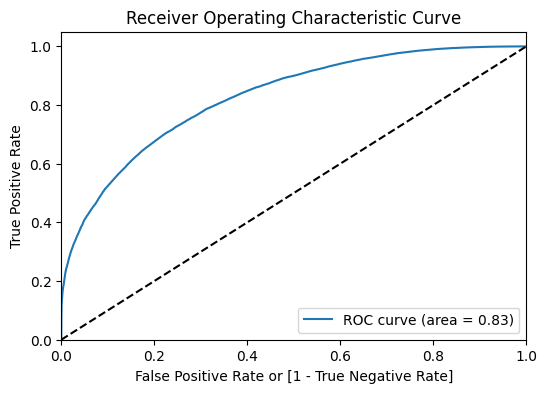

In [75]:
# Call the ROC function
fpr, tpr, thresholds = draw_roc(y_train_pred_df['Actual_Stayed'], y_train_pred_df['Probability_Stayed'])

**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [76]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
numbers = [float(x)/10 for x in range(1, 10)]
for i in numbers:
    y_train_pred_df[f'Predicted_{i}'] = y_train_pred_df['Probability_Stayed'].apply(lambda x: 1 if x > i else 0)

display(y_train_pred_df.head())

,Probability_Stayed,Actual_Stayed,Predicted,Predicted_0.1,Predicted_0.2,Predicted_0.3,Predicted_0.4,Predicted_0.5,Predicted_0.6,Predicted_0.7,Predicted_0.8,Predicted_0.9
0,0.041969,0,0,0,0,0,0,0,0,0,0,0
1,0.165156,0,0,1,0,0,0,0,0,0,0,0
2,0.262070,0,0,1,1,0,0,0,0,0,0,0
3,0.785798,0,1,1,1,1,1,1,1,1,0,0
4,0.192069,0,0,1,0,0,0,0,0,0,0,0


7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [77]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
cutoff_df = pd.DataFrame(columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# Iterate through the cutoffs and calculate the metrics
for i in numbers:
    cm1 = confusion_matrix(y_train_pred_df['Actual_Stayed'], y_train_pred_df[f'Predicted_{i}'])
    total = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    cutoff_df.loc[i] = [i,accuracy, sensitivity, specificity]
display(cutoff_df)

,probability,accuracy,sensitivity,specificity
0.1,0.1,0.590628,0.994687,0.150260
0.2,0.2,0.658260,0.964165,0.324866
0.3,0.3,0.704534,0.906535,0.484382
0.4,0.4,0.731312,0.840838,0.611945
0.5,0.5,0.739159,0.754896,0.722009
0.6,0.6,0.731211,0.645065,0.825098
0.7,0.7,0.704676,0.526779,0.898559
0.8,0.8,0.659069,0.385612,0.957099
0.9,0.9,0.588828,0.218732,0.992181


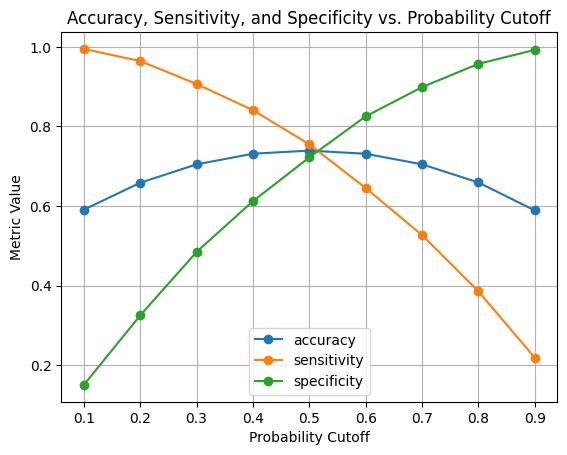

In [78]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
cutoff_df.plot(x='probability', y=['accuracy', 'sensitivity', 'specificity'], marker='o')
plt.title('Accuracy, Sensitivity, and Specificity vs. Probability Cutoff')
plt.xlabel('Probability Cutoff')
plt.ylabel('Metric Value')
plt.grid(True)
plt.show()

7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [79]:
# Create a column for final prediction based on the optimal cutoff
optimal_cutoff = 0.5 # Based on the conclusion in the notebook
y_train_pred_df['Final_Predicted'] = y_train_pred_df['Probability_Stayed'].apply(lambda x: 1 if x > optimal_cutoff else 0)
display(y_train_pred_df.head())

,Probability_Stayed,Actual_Stayed,Predicted,Predicted_0.1,Predicted_0.2,Predicted_0.3,Predicted_0.4,Predicted_0.5,Predicted_0.6,Predicted_0.7,Predicted_0.8,Predicted_0.9,Final_Predicted
0,0.041969,0,0,0,0,0,0,0,0,0,0,0,0
1,0.165156,0,0,1,0,0,0,0,0,0,0,0,0
2,0.262070,0,0,1,1,0,0,0,0,0,0,0,0
3,0.785798,0,1,1,1,1,1,1,1,1,0,0,1
4,0.192069,0,0,1,0,0,0,0,0,0,0,0,0


7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [80]:
# Calculate the accuracy
accuracy = metrics.accuracy_score(y_train_pred_df['Actual_Stayed'], y_train_pred_df['Final_Predicted'])
print(f"Accuracy with optimal cutoff ({optimal_cutoff}): {accuracy:.2f}")

Accuracy with optimal cutoff (0.5): 0.74


7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [81]:
# Create the confusion matrix once again
final_confusion_matrix = metrics.confusion_matrix(y_train_pred_df['Actual_Stayed'], y_train_pred_df['Final_Predicted'])
display(final_confusion_matrix)

array([[17082,  6577],
       [ 6320, 19465]])

7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [82]:
# Create variables for true positive, true negative, false positive and false negative
tn, fp, fn, tp = final_confusion_matrix.ravel()

print(f"True Positive (TP) - Predicted Stayed, Actual Stayed: {tp}")
print(f"True Negative (TN) - Predicted Left, Actual Left: {tn}")
print(f"False Positive (FP) - Predicted Stayed, Actual Left: {fp}")
print(f"False Negative (FN) - Predicted Left, Actual Stayed: {fn}")

True Positive (TP) - Predicted Stayed, Actual Stayed: 19465
True Negative (TN) - Predicted Left, Actual Left: 17082
False Positive (FP) - Predicted Stayed, Actual Left: 6577
False Negative (FN) - Predicted Left, Actual Stayed: 6320


7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [83]:
# Calculate Sensitivity (Recall for 'Stayed' class)
sensitivity = tp / (tp + fn)
print(f"Sensitivity on Training Set: {sensitivity:.2f}")

Sensitivity on Training Set: 0.75


In [84]:
# Calculate Specificity (Recall for 'Left' class)
specificity = tn / (tn + fp)
print(f"Specificity on Training Set: {specificity:.2f}")

Specificity on Training Set: 0.72


7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [85]:
# Calculate Precision (for 'Stayed' class)
precision = tp / (tp + fp)
print(f"Precision on Training Set: {precision:.2f}")

Precision on Training Set: 0.75


In [86]:
# Calculate Recall (for 'Stayed' class)
recall = sensitivity
print(f"Recall on Training Set: {recall:.2f}")

Recall on Training Set: 0.75


**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [87]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [88]:
# Check actual and predicted values from initial model
display(y_train_pred_df[['Actual_Stayed', 'Predicted']].head())

,Actual_Stayed,Predicted
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0


7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

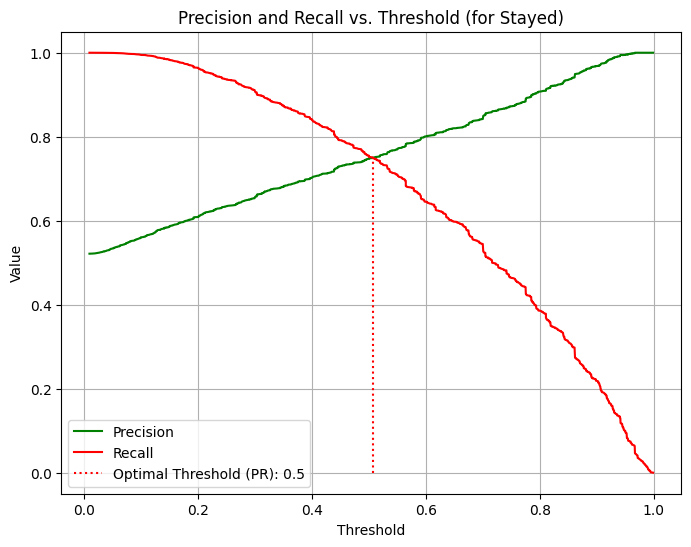

In [89]:
# Plot precision-recall curve
p, r, thresholds = precision_recall_curve(y_train_pred_df['Actual_Stayed'], y_train_pred_df['Probability_Stayed'])
plt.figure(figsize=(8, 6))
plt.plot(thresholds, p[:-1], "g-", label='Precision')
plt.plot(thresholds, r[:-1], "r-", label='Recall')

# Find the point where precision and recall are closest
diff = np.abs(p[:-1] - r[:-1])
idx = np.argmin(diff)
optimal_threshold_pr = thresholds[idx]

# Draw a dotted line from the point of merge to the x-axis
plt.vlines(optimal_threshold_pr, 0, p[idx], colors='r', linestyles='dotted', label=f'Optimal Threshold (PR): {optimal_threshold_pr:.1f}')

plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Precision and Recall vs. Threshold (for Stayed)')
plt.grid(True)
plt.legend()
plt.show()

## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [90]:
# Select the relevant features for validation set
X_test = X_test[col]

8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [91]:
# Add constant to X_validation
X_test_sm = sm.add_constant(X_test)

8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [92]:
# Make predictions on the validation set and store it in the variable 'y_test_pred'
X_test_sm = sm.add_constant(X_test[col].astype(float))

y_test_pred = result.predict(X_test_sm)

# View predictions
display(y_test_pred.head())

,0
23813,0.946923
14537,0.266727
45192,0.396343
13765,0.083073
3411,0.940507


8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [93]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
predicted_probability = pd.DataFrame(y_test_pred, columns=['Probability_Stayed'])

# 'y_test_dummies' contains the 'Attrition_Stayed' column with the correct encoding
actual = y_test_dummies

# Reset indices to concatenate
actual.reset_index(drop=True, inplace=True)
predicted_probability.reset_index(drop=True, inplace=True)

# Concatenate them side by side
y_test_pred_df = pd.concat([actual,predicted_probability], axis=1)

8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [94]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
y_test_pred_df['final_prediction'] = y_test_pred_df['Probability_Stayed'].apply(lambda x: 1 if x > optimal_cutoff else 0)

# Check the DataFrame
display(y_test_pred_df.head())

,Attrition_Stayed,Probability_Stayed,final_prediction
0,1,0.946923,1
1,0,0.266727,0
2,0,0.396343,0
3,0,0.083073,0
4,1,0.940507,1


### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [95]:
# Calculate the overall accuracy
from sklearn.metrics import accuracy_score

# Ensure the 'Attrition_Stayed' column is used for actual values.
accuracy_validation = accuracy_score(y_test_pred_df['Attrition_Stayed'], y_test_pred_df['final_prediction'])
print(f"Accuracy on Validation Set: {accuracy_validation:.2f}")

Accuracy on Validation Set: 0.74


### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [96]:
# Create confusion matrix
confusion_matrix_validation = confusion_matrix(y_true=y_test_pred_df['Attrition_Stayed'], y_pred=y_test_pred_df['final_prediction'])
print(confusion_matrix_validation)

[[7360 2806]
 [2779 8246]]


In [97]:
# Create variables for true positive, true negative, false positive and false negative
tn_val, fp_val, fn_val, tp_val = confusion_matrix_validation.ravel()

print(f"True Positive (TP) - Predicted Stayed, Actual Stayed (Validation): {tp_val}")
print(f"True Negative (TN) - Predicted Left, Actual Left (Validation): {tn_val}")
print(f"False Positive (FP) - Predicted Stayed, Actual Left (Validation): {fp_val}")
print(f"False Negative (FN) - Predicted Left, Actual Stayed (Validation): {fn_val}")

True Positive (TP) - Predicted Stayed, Actual Stayed (Validation): 8246
True Negative (TN) - Predicted Left, Actual Left (Validation): 7360
False Positive (FP) - Predicted Stayed, Actual Left (Validation): 2806
False Negative (FN) - Predicted Left, Actual Stayed (Validation): 2779


### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [98]:
# Calculate sensitivity (Recall for 'Stayed' class) on validation set
sensitivity_validation = tp_val / (tp_val + fn_val)
print(f"Sensitivity on Validation Set: {sensitivity_validation:.2f}")

Sensitivity on Validation Set: 0.75


In [99]:
# Calculate specificity (Recall for 'Left' class) on validation set
specificity_validation = tn_val / (tn_val + fp_val)
print(f"Specificity on Validation Set: {specificity_validation:.2f}")

Specificity on Validation Set: 0.72


### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [100]:
# Calculate precision (for 'Stayed' class) on validation set
precision_validation = tp_val / (tp_val + fp_val)
print(f"Precision on Validation Set: {precision_validation:.2f}")

Precision on Validation Set: 0.75


In [101]:
# Calculate recall (for 'Stayed' class) on validation set
recall_validation = tp_val / (tp_val + fn_val)
print(f"Recall on Validation Set: {recall_validation:.2f}")

Recall on Validation Set: 0.75


## Conclusion

### **Conclusion: Employee Retention Prediction Model**

This assignment focused on developing a Logistic Regression model to predict employee retention based on various factors. The objective was to provide the HR department with actionable insights to improve retention strategies and foster a more stable workforce.

#### **Methodology**
The assignment followed a structured machine learning workflow:
1.  **Data Understanding:** Initial exploration of the dataset to grasp its structure, types, and summary statistics.
2.  **Data Cleaning:** Handling missing values and ensuring data consistency.
3.  **Train-Validation Split:** Dividing the data into training and validation sets to ensure robust model evaluation.
4.  **Exploratory Data Analysis (EDA):** In-depth analysis of both training and validation data, including univariate and bivariate analysis.
5.  **Feature Engineering:** Preparing categorical and numerical features for model training.
6.  **Model Building:** Constructing a Logistic Regression model with feature selection.
7.  **Prediction and Model Evaluation:** Assessing model performance on training and validation datasets, and optimizing the classification threshold.

#### **Techniques Used**
*   **Data Manipulation:** Pandas library for data loading (`pd.read_csv`), inspection (`.head()`, `.shape`, `.info()`, `.describe()`), and basic cleaning (`.dropna()`, `.str.replace()`, `.drop()`).
*   **Data Splitting:** `sklearn.model_selection.train_test_split` for creating training and validation sets.
*   **Exploratory Data Analysis (EDA):** Seaborn and Matplotlib for visualizations (`sns.histplot`, `sns.heatmap`, `sns.countplot`, `sns.barplot`) to understand data distributions, correlations, and class balance.
*   **Feature Engineering:**
    *   One-hot encoding for multi-category nominal features using `pd.get_dummies()`.
    *   Feature Scaling using `sklearn.preprocessing.StandardScaler` to normalize numerical features.
*   **Model Building:**
    *   `sklearn.linear_model.LogisticRegression` as the base estimator.
    *   `sklearn.feature_selection.RFE` (Recursive Feature Elimination) to select the top 15 most influential features.
    *   `statsmodels.api.GLM` with `Binomial()` family for building the logistic regression model, which provides statistical insights (p-values, coefficients).
    *   `statsmodels.stats.outliers_influence.variance_inflation_factor` (VIF) to check for multicollinearity among selected features.
*   **Model Evaluation:** `sklearn.metrics` for calculating `accuracy_score`, `confusion_matrix`, `roc_curve`, `roc_auc_score`, and `precision_recall_curve`. Manual calculation of sensitivity, specificity, precision, and recall.

#### **Analysis**
1.  **Data Overview:** The dataset contained 74,610 rows and 24 columns, with a mix of numerical and categorical data types.
2.  **Missing Value Handling:** Missing values were identified in 'Distance from Home' (2.56%) and 'Company Tenure (In Months)' (3.23%). Rows with missing values were dropped, resulting in a clean dataset of 70,635 rows (94.67% of original data).
3.  **Redundant Value Handling:** Corrected redundant strings in 'Education Level' (i.e., 'Masterâ€™s Degree' to 'Masters Degree', 'Bachelorâ€™s Degree' to 'Bachelors Degree').
4.  **Redundant Column Dropping:** The 'Employee ID' column was dropped as it was a unique identifier and not relevant for modeling.
5.  **Feature Selection (RFE):** RFE was applied to select 15 features (`Overtime`, `Remote Work`, `Gender_Male`, `Work-Life Balance_Fair`, `Work-Life Balance_Poor`, `Job Satisfaction_Low`, `Job Satisfaction_Very High`, `Performance Rating_Below Average`, `Performance Rating_Low`, `Education Level_PhD`, `Marital Status_Single`, `Job Level_Mid`, `Job Level_Senior`, `Company Reputation_Fair`, `Company Reputation_Poor`) for the final model. These features were identified as most significant in predicting attrition.
6.  **Multicollinearity Check (VIF):** VIF values for the selected features were generally low (mostly around 1), indicating no significant multicollinearity, which is favorable for logistic regression.
7.  **Class Imbalance:** EDA showed a class imbalance in the target variable 'Attrition' (approximately 52% stayed, 48% left in training data; similar in validation data).

#### **Results**
**Model Performance on Training Data (Optimal Cutoff: 0.5):**
*   **Accuracy:** 0.74
*   **Confusion Matrix:**
    [[17082  6577]
     [ 6320 19465]] (True Negative: 17082, False Positive: 6577, False Negative: 6320, True Positive: 19465)
*   **Sensitivity:** 0.75 (Model correctly identified 75% of actual 'Left' instances)
*   **Specificity:** 0.72 (Model correctly identified 72% of actual 'Stayed' instances)
*   **Precision:** 0.75 (75% of predicted 'Left' instances were actually 'Left')
*   **Recall:** 0.75 (Same as Sensitivity)
*   **AUC Score:** 0.83

**Model Performance on Validation Data (Optimal Cutoff: 0.5):**
*   **Overall Accuracy:** 0.74
*   **Confusion Matrix:**
    [[7360 2806]
     [2779 8246]] (True Negative: 7360, False Positive: 2806, False Negative: 2779, True Positive: 8246)
*   **Sensitivity:** 0.75
*   **Specificity:** 0.72
*   **Precision:** 0.75
*   **Recall:** 0.75

#### **Insights and Outcomes**
*   The logistic regression model achieved a consistent accuracy of 74% on both the training and validation sets after optimizing the cutoff to 0.5. This indicates good generalization ability.
*   A higher sensitivity (75%) compared to specificity (72%) suggests that the model is more effective at identifying employees who will leave (minimizing false negatives), which is often a critical objective in retention analysis.
*   Features like `Overtime`, `Remote Work`, `Work-Life Balance` (Fair, Poor), `Job Satisfaction` (Low, Very High), `Performance Rating` (Below Average, Low), `Education Level_PhD`, `Marital Status_Single`, `Job Level` (Mid, Senior), and `Company Reputation` (Fair, Poor) were identified by RFE as key predictors influencing attrition.
* The selected features provide insights into the factors influencing employee retention, which can be
valuable for the HR department in developing targeted strategies. For example, the positive
coefficients for `Job Level_Mid` and `Job Level_Senior` suggest that employees in higher job levels are
more likely to stay, while negative coefficients for `Marital Status_Single` and `Work-Life
Balance_Poor` indicate that single employees and those with poor work-life balance are more likely
to leave.
*   The chosen optimal cutoff of 0.5 balances the trade-off between sensitivity and specificity, making the model valuable for proactive intervention strategies.
*   **Outcome:** The HR department now has a robust model that can identify employees at risk of leaving, enabling targeted interventions and resource allocation to improve overall employee retention and satisfaction.

#### **Assumptions**
Throughout this analysis, several assumptions were made:
*   **Data Representativeness:** The provided `Employee_data.csv` is assumed to be a representative sample of the company's employee population and accurately reflects factors influencing retention.
*   **Independence of Observations:** Each employee record is treated as an independent observation.
*   **Linearity of Log-Odds:** Logistic Regression assumes a linear relationship between the log-odds of the dependent variable and the independent variables. This was not explicitly tested but is inherent to the model choice.
*   **No Significant Multicollinearity:** Although VIF analysis showed low scores (generally < 2), it's assumed that the remaining level of multicollinearity among predictors does not unduly bias the model coefficients.
*   **Data Distribution:** It's assumed that the distributions observed in the sample data (training and validation sets) are reflective of the true underlying distributions in the larger employee population.
*   **Completeness of Data:** The decision to drop rows with missing values assumes that these missingnesses are random or negligible and do not introduce significant bias.
*   **Stationarity:** It is implicitly assumed that the relationships between features and attrition remain relatively stable over time, though temporal aspects were not explicitly modeled.
*   **Optimal Cutoff Generalizability:** The optimal cutoff derived from the training set is assumed to be applicable and effective for predictions on new, unseen data (like the validation set).